In [22]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import preprocessing

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from skfuzzy.cluster import cmeans
import skfuzzy as fuzz

In [23]:

df=pd.read_csv("data.csv", sep=";")
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [24]:
df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)
num_df=df.drop('Target', axis=1) 
num_df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  \
0                      12  ...   
1                       3  ...   
2                      37  ...   
3                      37  ...   
4                      38  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  
0             1.4  1.74  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79  

[5 rows x 36 columns]

In [25]:
st_tmp = StandardScaler()

num_df_scaled = pd.DataFrame(st_tmp.fit_transform(num_df), columns=num_df.columns)
df_scaled = pd.concat([df['Target'].reset_index(drop=True), num_df_scaled], axis=1)
df_scaled

Target  Marital status  Application mode  Application order    Course  \
0      Dropout       -0.294829         -0.095470           2.490896 -4.209520   
1     Graduate       -0.294829         -0.209869          -0.554068  0.192580   
2      Dropout       -0.294829         -1.010660           2.490896  0.103404   
3     Graduate       -0.294829         -0.095470           0.207173  0.444115   
4     Graduate        1.356212          1.162916          -0.554068 -0.408389   
...        ...             ...               ...                ...       ...   
4419  Graduate       -0.294829         -1.010660           3.252137  0.444115   
4420   Dropout       -0.294829         -1.010660           0.207173  0.444115   
4421   Dropout       -0.294829         -1.010660          -0.554068  0.311805   
4422  Graduate       -0.294829         -1.010660          -0.554068  0.140722   
4423  Graduate       -0.294829         -0.495866          -0.554068  0.444115   

      Daytime/evening attendance  Previous qualification  \
0                       0.350082                -0.35023   
1                       0.350082                -0.35023   
2                       0.350082                -0.35023   
3                       0.350082                -0.35023   
4                      -2.856470                -0.35023   
...                          ...                     ...   
4419                    0.350082                -0.35023   
4420                    0.350082                -0.35023   
4421                    0.350082                -0.35023   
4422                    0.350082                -0.35023   
4423                    0.350082                -0.35023   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                          -0.804841    -0.126298               -0.036018   
1                           2.076819    -0.126298               -1.189759   
2                          -0.804841    -0.126298                1.117723   
3                          -0.804841    -0.126298                1.181819   
4                          -2.473171    -0.126298                1.117723   
...                              ...          ...                     ...   
4419                       -0.577342    -0.126298               -1.189759   
4420                       -0.956508    14.916228               -1.189759   
4421                        1.621820    -0.126298                1.117723   
4422                        3.593483    -0.126298                1.117723   
4423                        1.470154     2.911135                1.181819   

      ...  Curricular units 1st sem (without evaluations)  \
0     ...                                       -0.199273   
1     ...                                       -0.199273   
2     ...                                       -0.199273   
3     ...                                       -0.199273   
4     ...                                       -0.199273   
...   ...                                             ...   
4419  ...                                       -0.199273   
4420  ...                                       -0.199273   
4421  ...                                       -0.199273   
4422  ...                                       -0.199273   
4423  ...                                       -0.199273   

      Curricular units 2nd sem (credited)  \
0                               -0.282442   
1                               -0.282442   
2                               -0.282442   
3                               -0.282442   
4                               -0.282442   
...                                   ...   
4419                            -0.282442   
4420                            -0.282442   
4421                            -0.282442   
4422                            -0.282442   
4423                            -0.282442   

      Curricular units 2nd sem (enrolled)  \
0                               -2.838337   
1                        

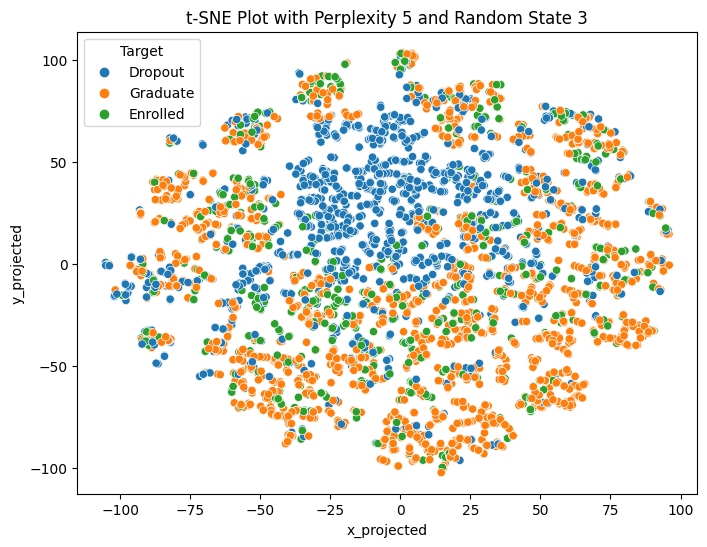

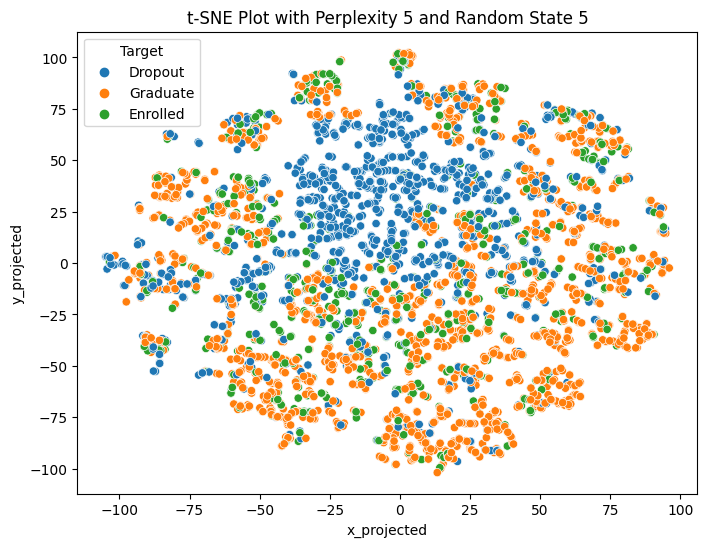

--------------------------------------------


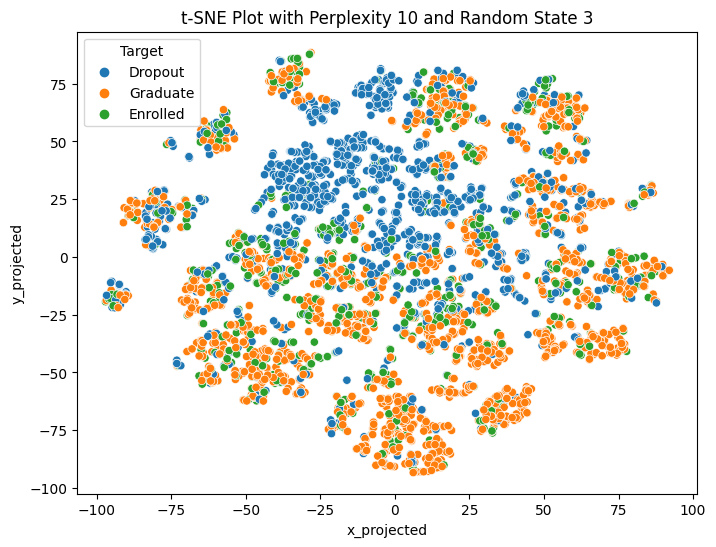

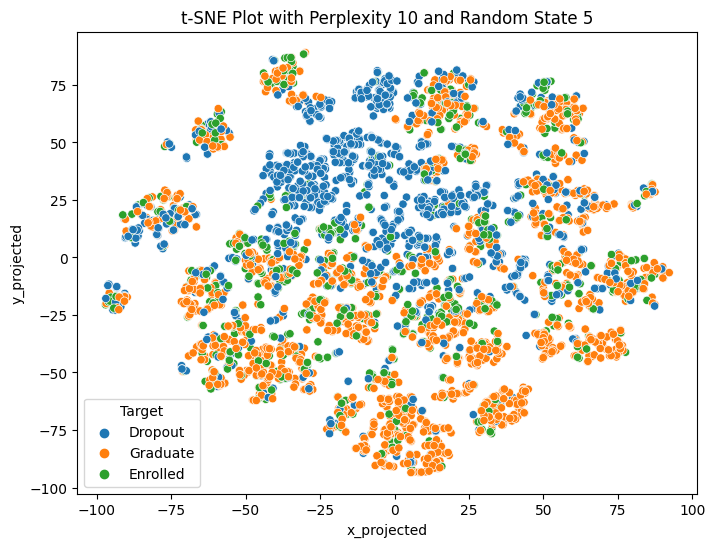

--------------------------------------------


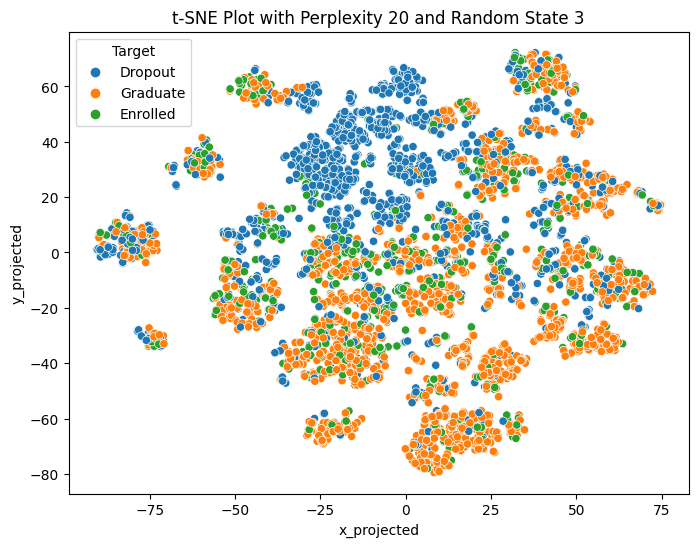

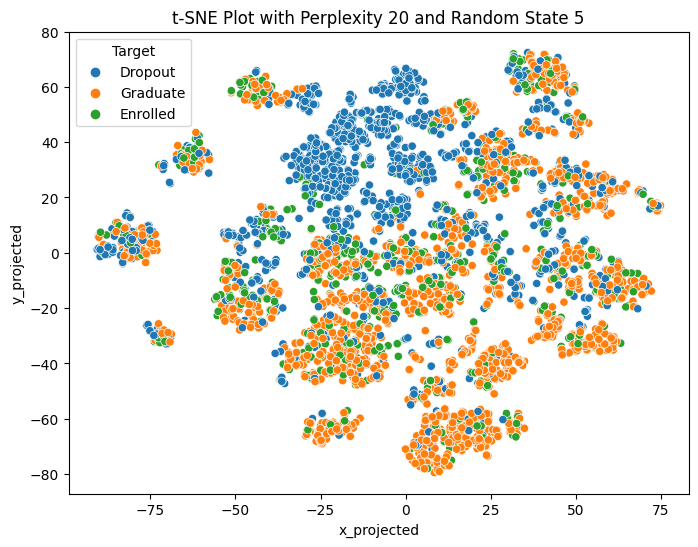

--------------------------------------------


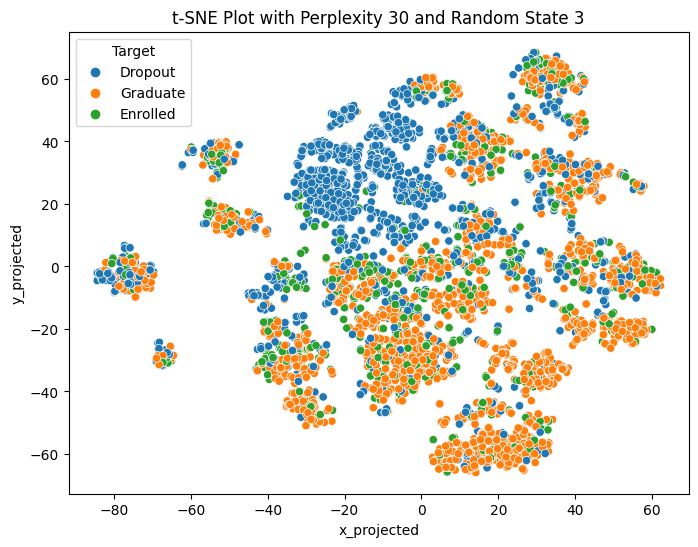

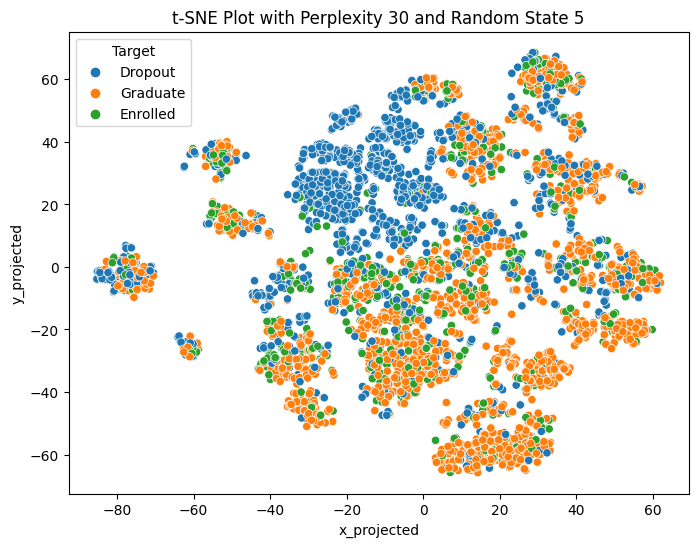

--------------------------------------------


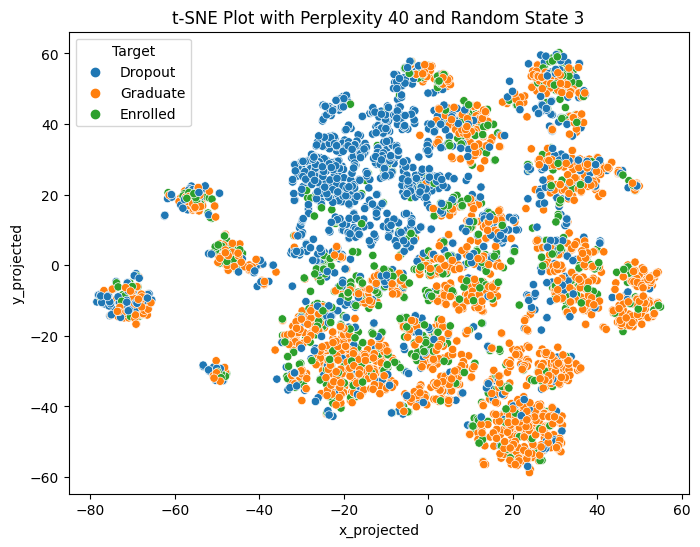

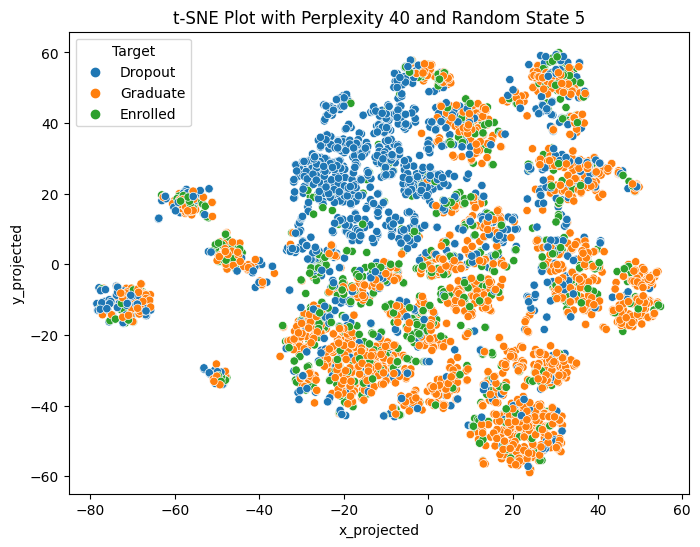

--------------------------------------------


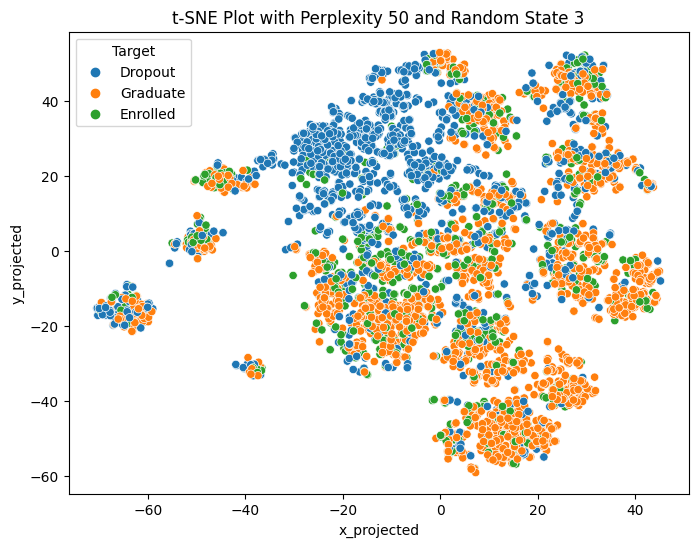

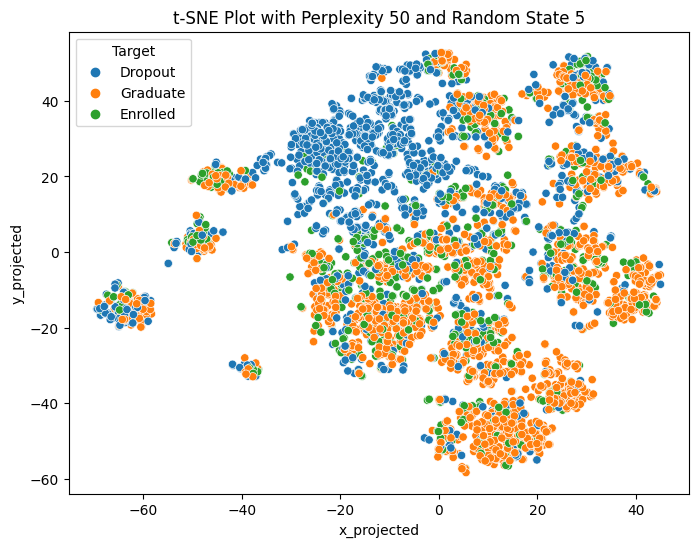

--------------------------------------------


In [26]:
#TSNE plots
for perp in [5, 10, 20, 30, 40, 50]:
    for rs in [3, 5]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(num_df_scaled)

        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])

        df_combo = pd.concat([df_scaled.reset_index(drop=True), df_tsne], axis=1)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_combo, x='x_projected', y='y_projected', hue='Target')
        plt.title(f't-SNE Plot with Perplexity {perp} and Random State {rs}')
        plt.show()

    print('--------------------------------------------')


In [27]:
X=num_df_scaled
dm=pdist(X, metric='euclidean')
dist_mat=squareform(dm)
Z = linkage(dm, method='average')

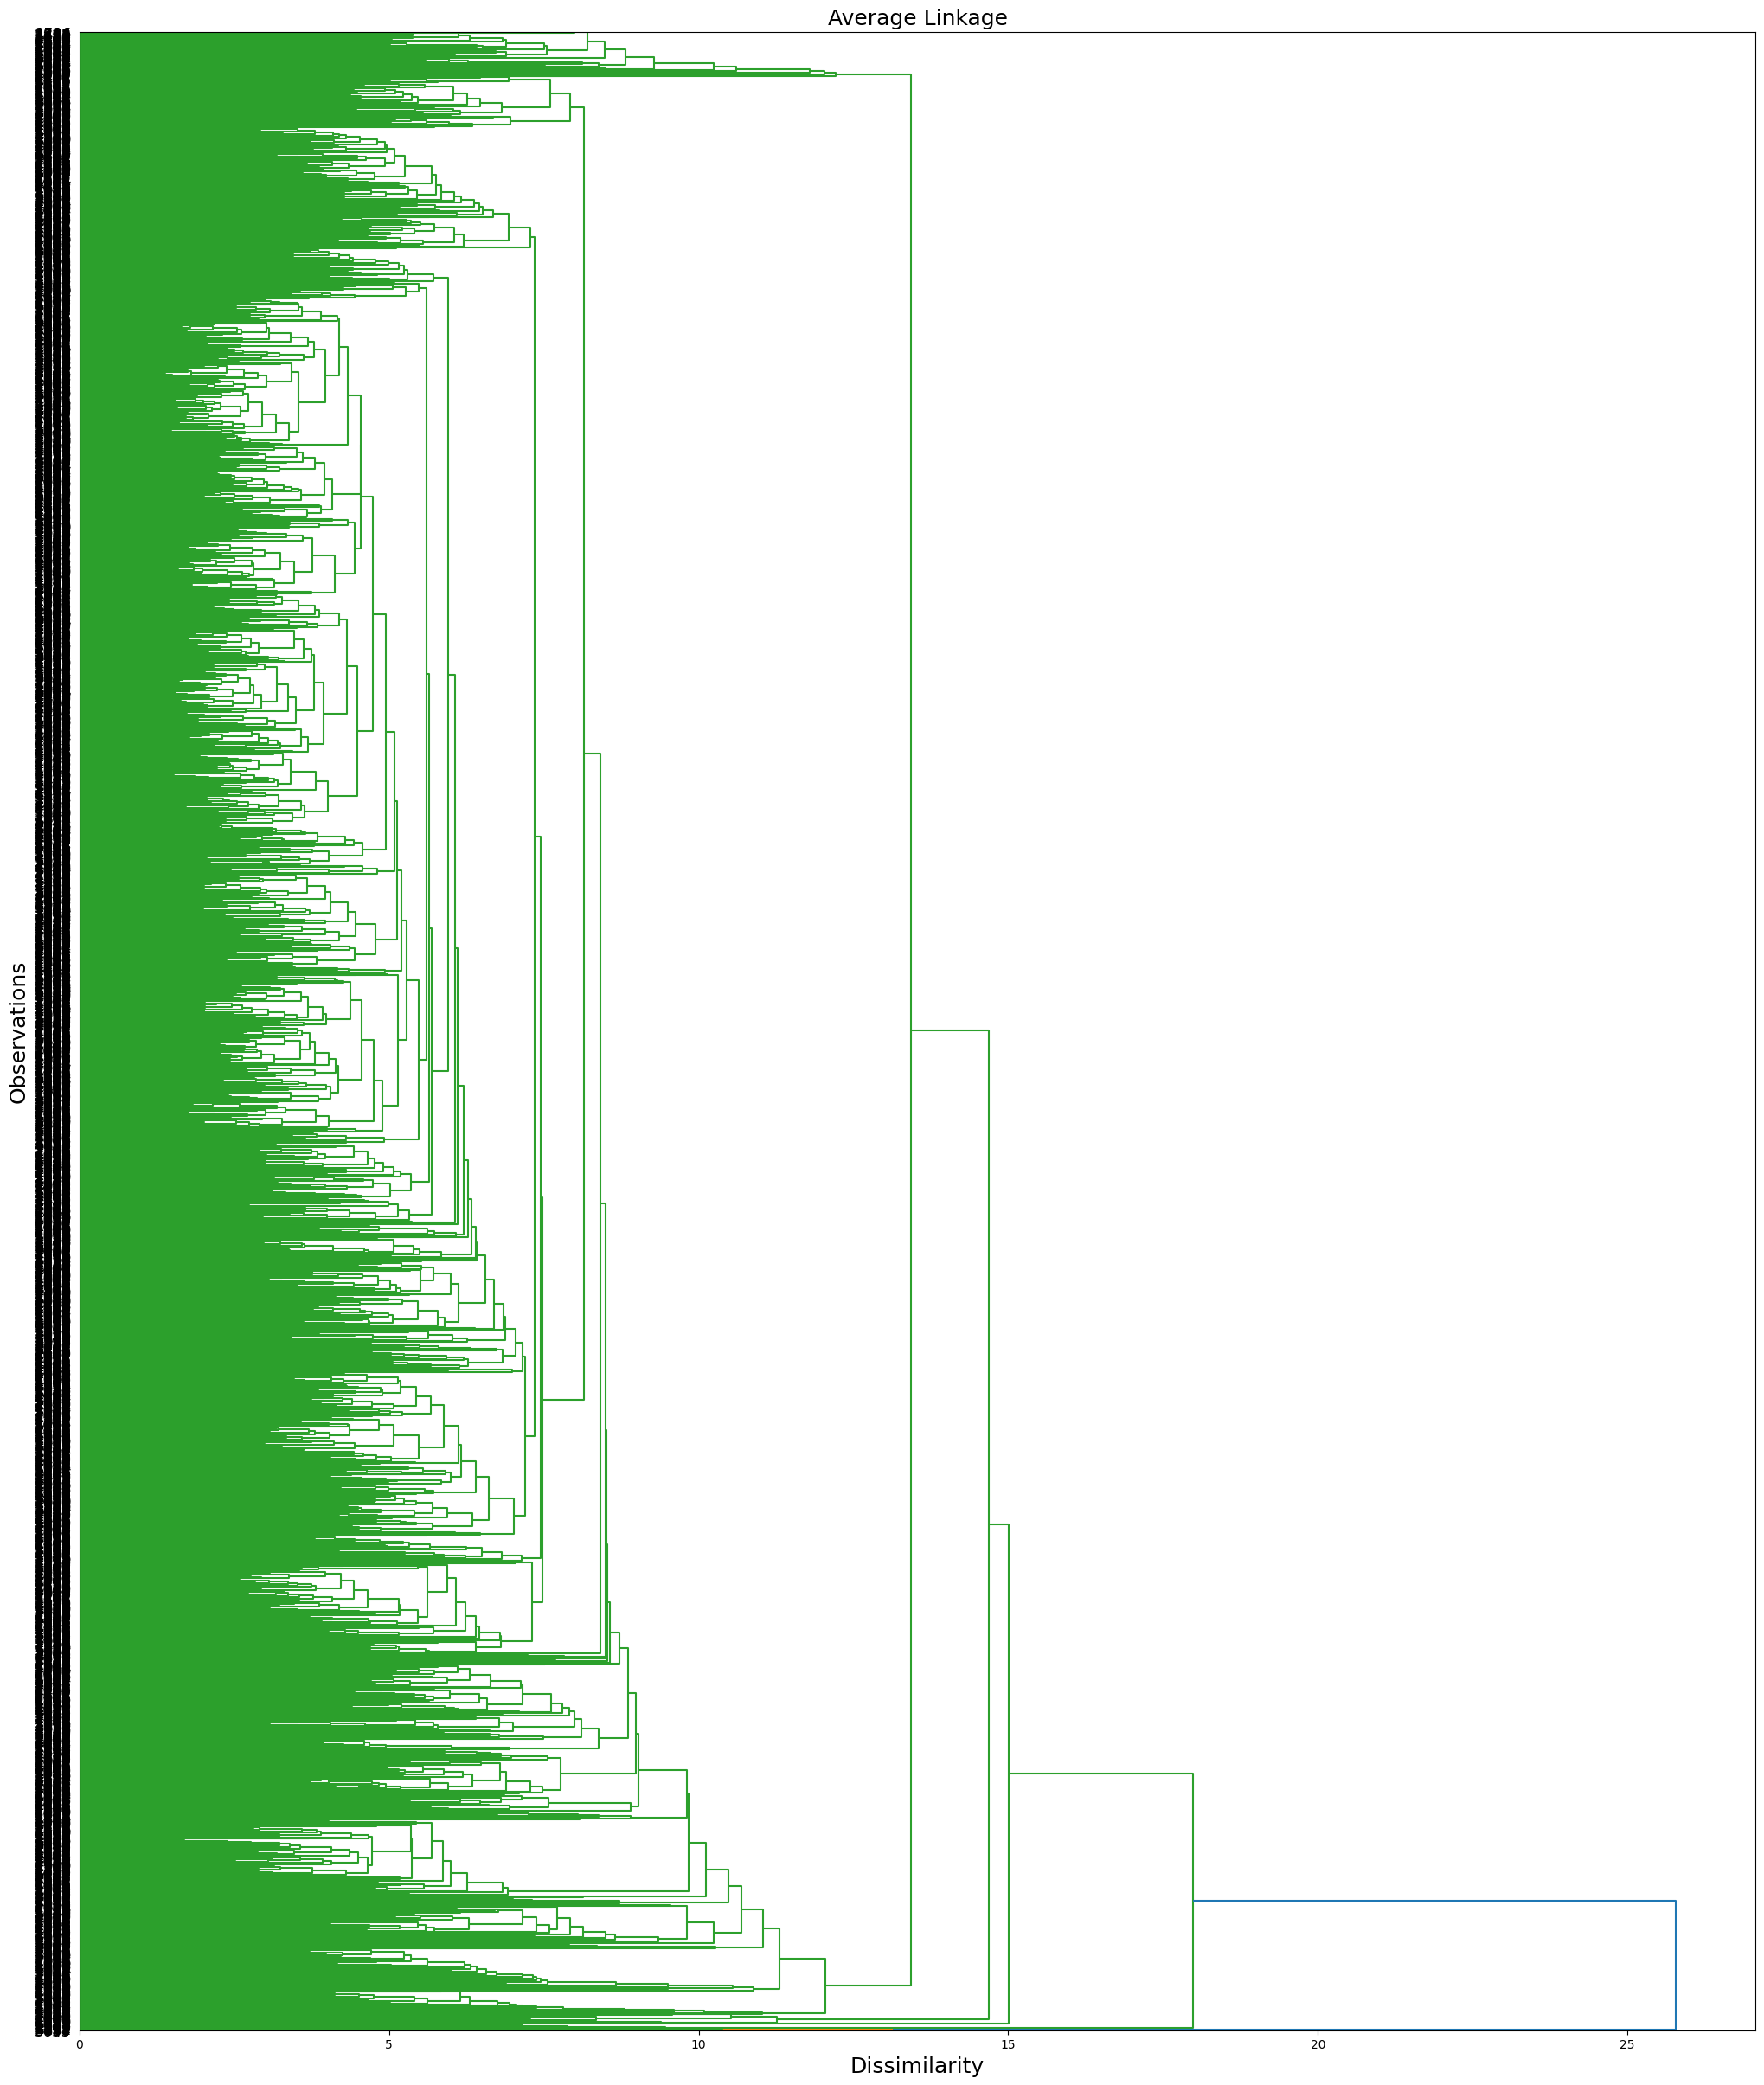

In [28]:
fig, ax = plt.subplots(figsize=(25, 30))
d=dendrogram(Z, orientation='right', ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Average Linkage', fontsize=18)
plt.show()

In [29]:
X=num_df_scaled
dm=pdist(X, metric='euclidean')
dist_mat=squareform(dm)
Z = linkage(dm, method='single')

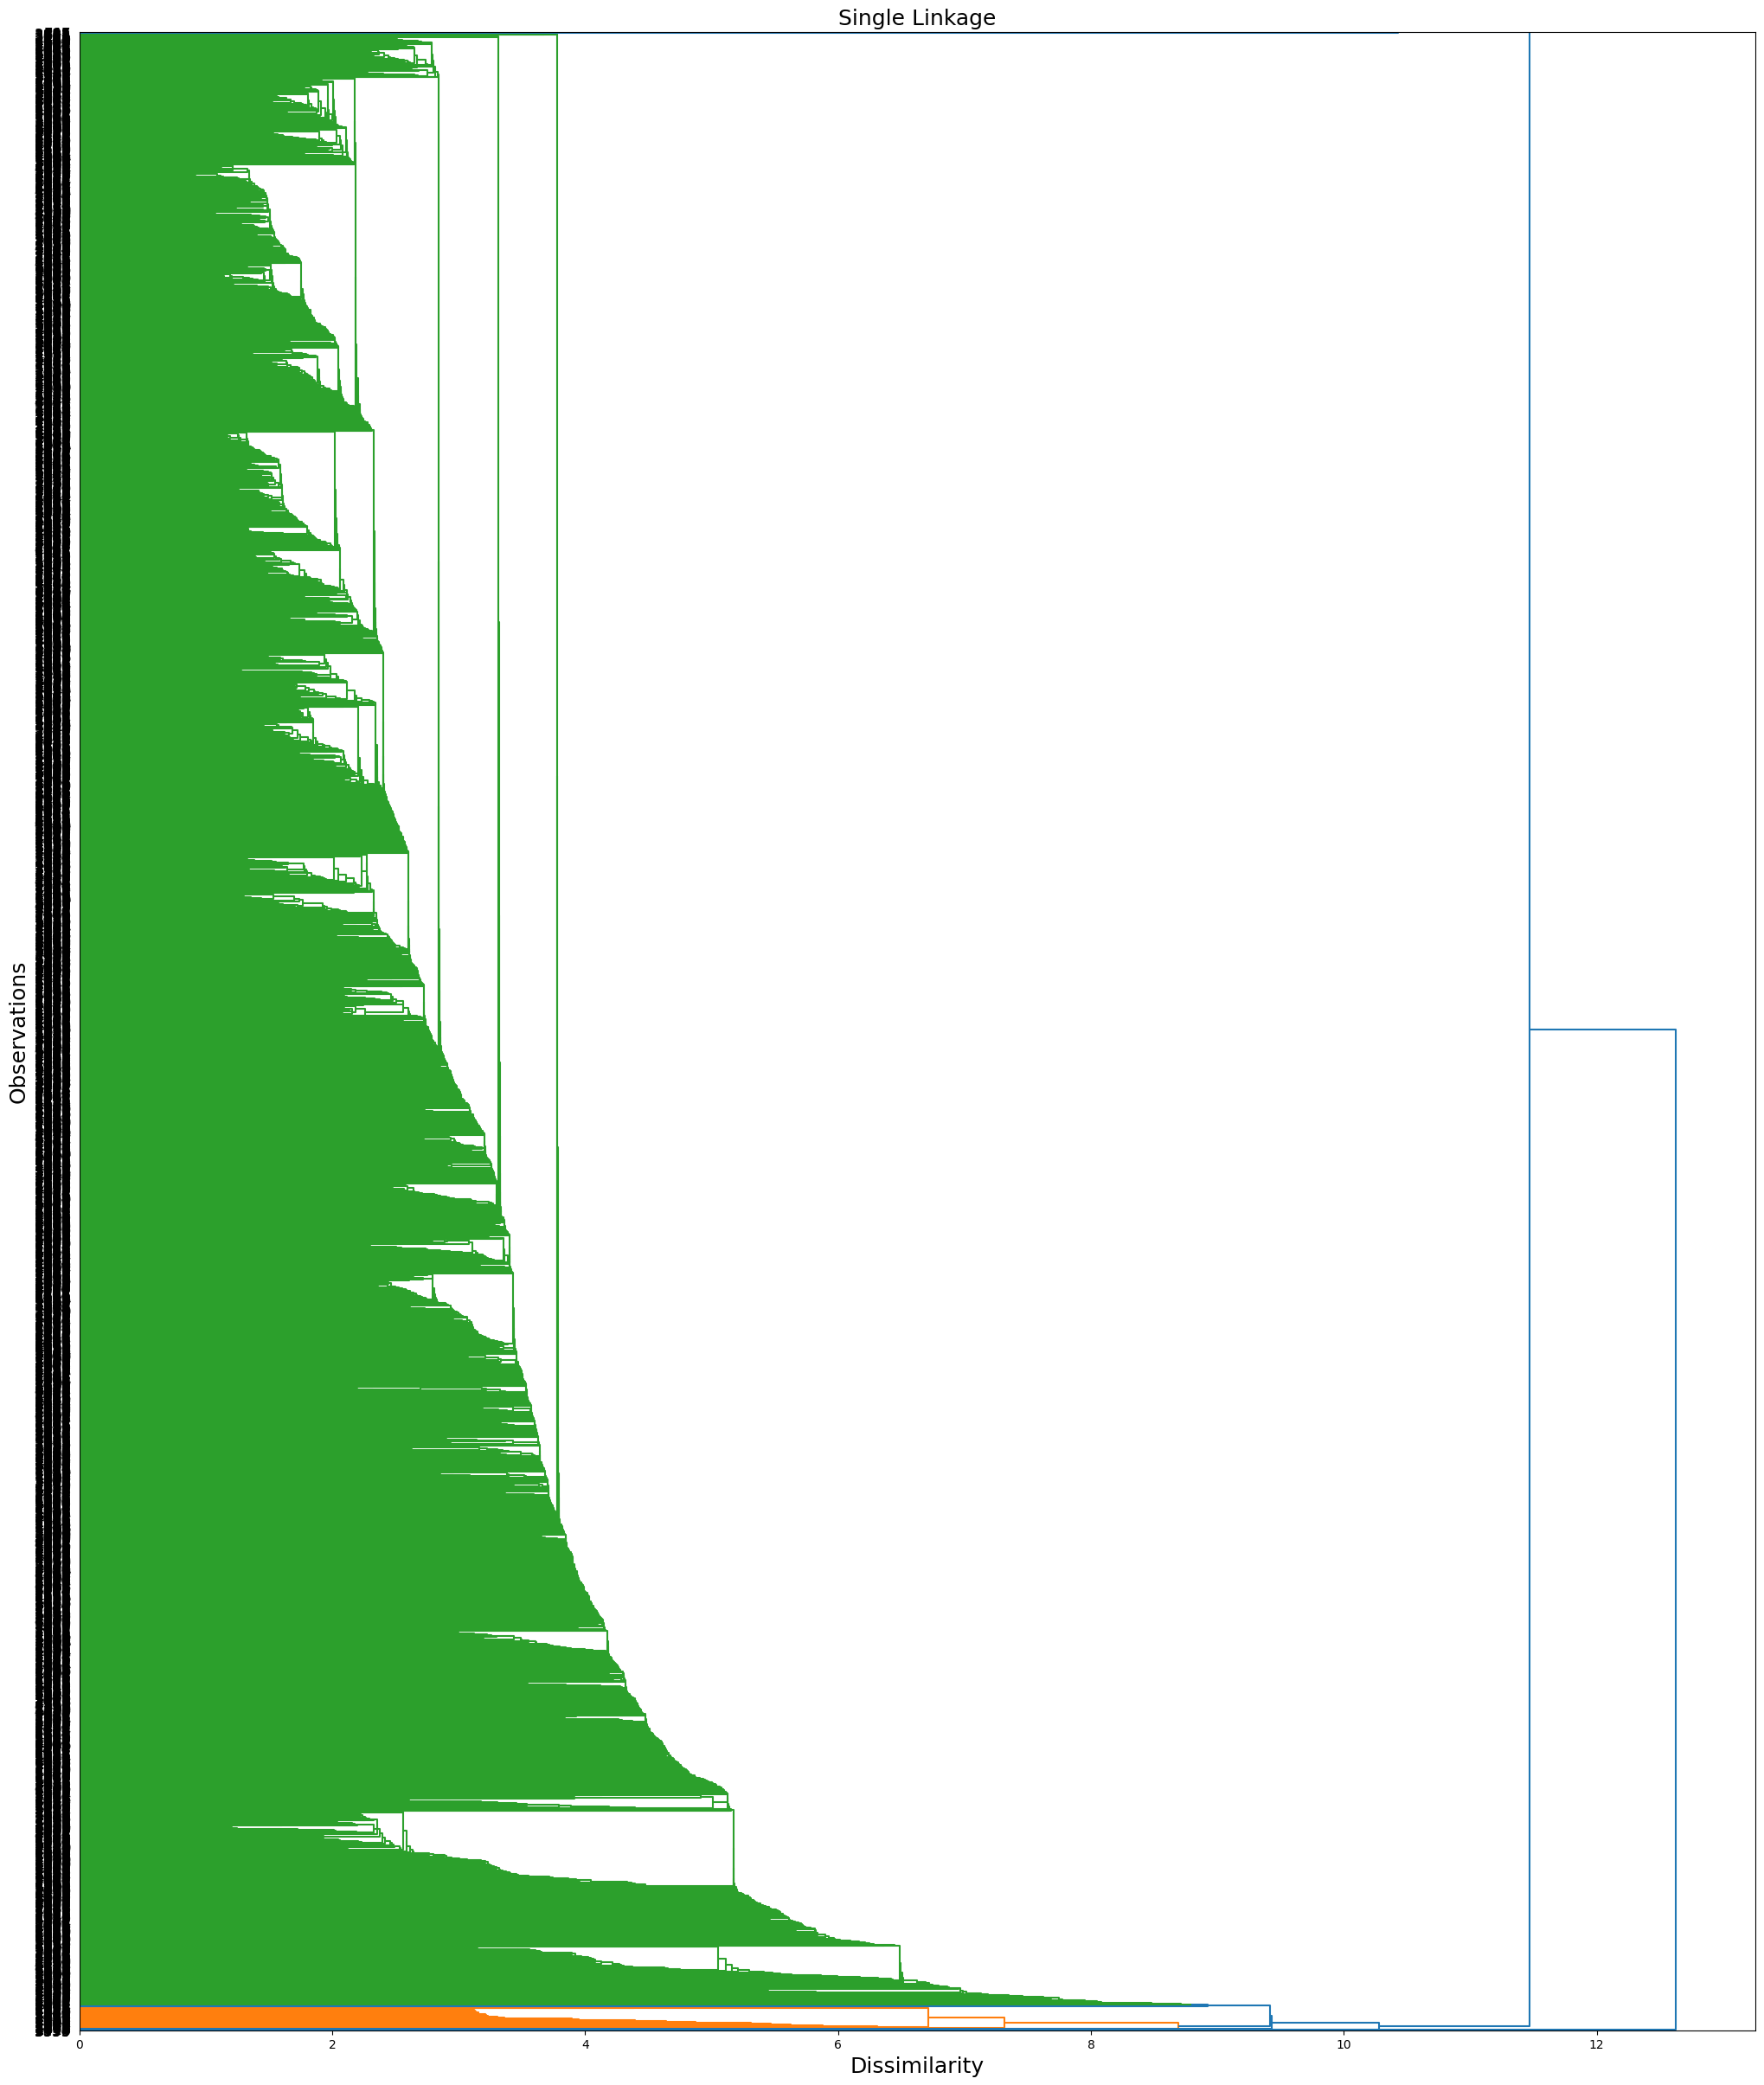

In [30]:
fig, ax = plt.subplots(figsize=(25, 30))
d=dendrogram(Z, orientation='right', ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Single Linkage', fontsize=18)
plt.show()

In [31]:
X=num_df_scaled
dm=pdist(X, metric='euclidean')
dist_mat=squareform(dm)
Z = linkage(dm, method='complete')

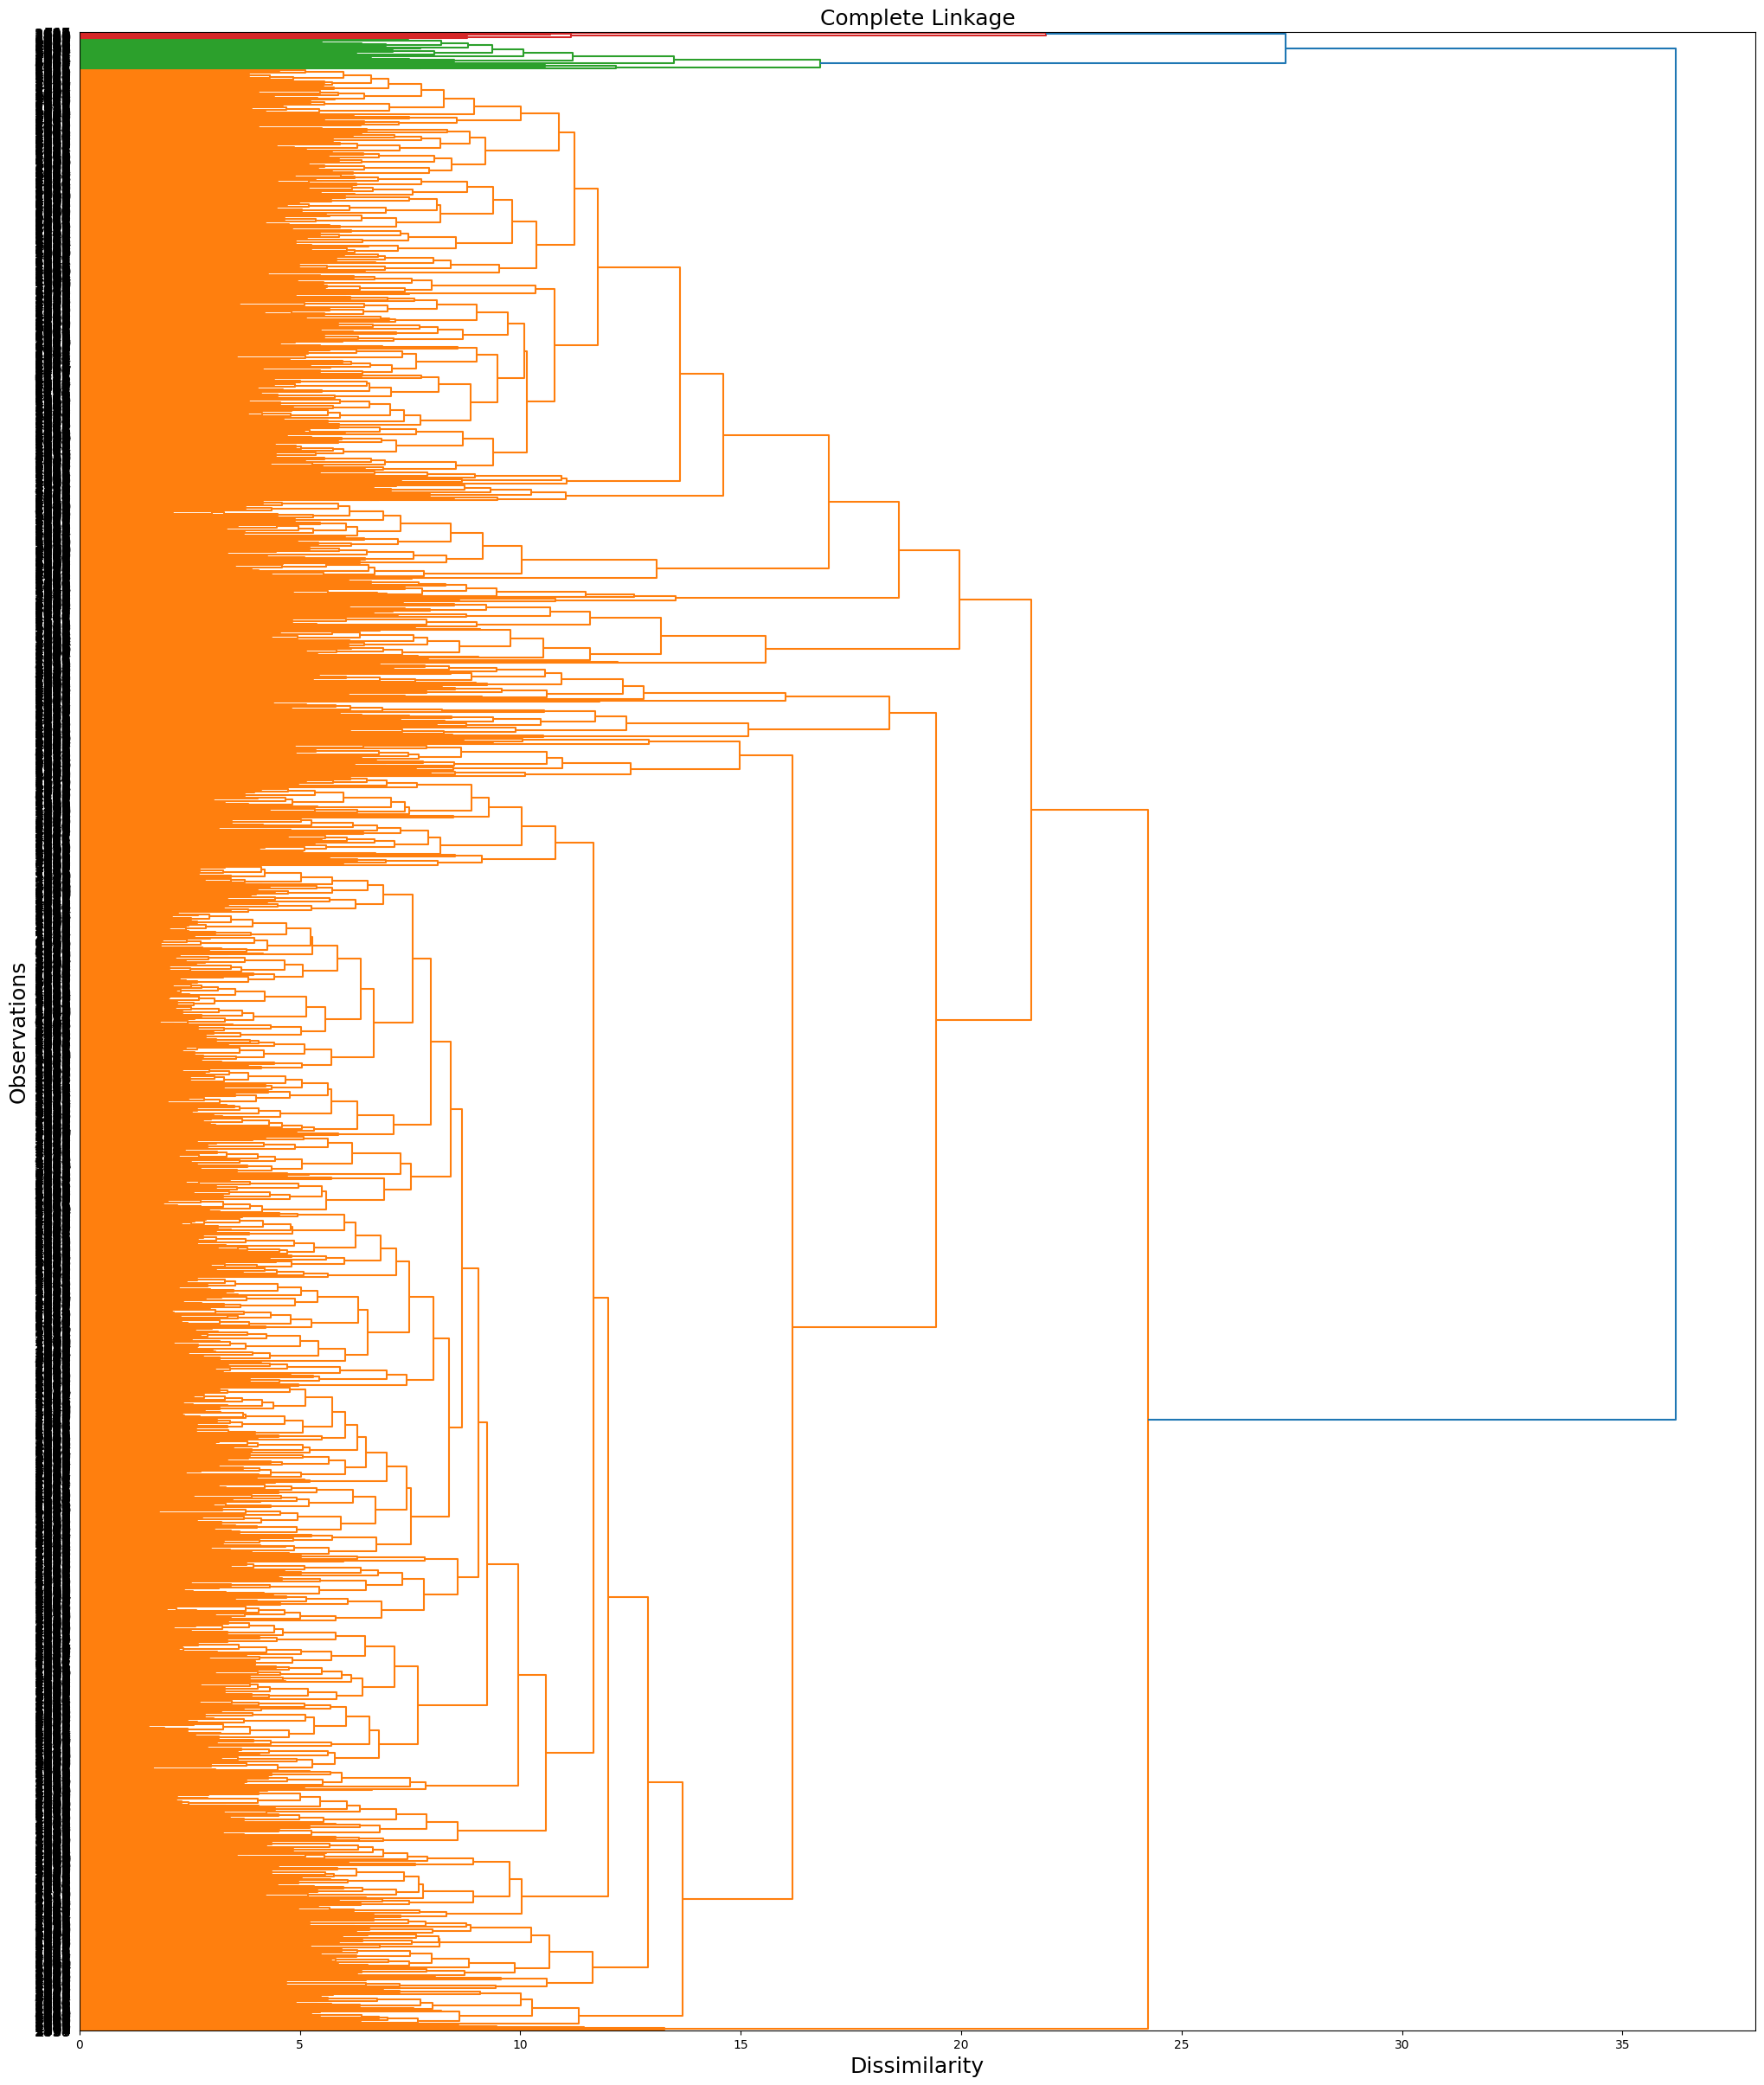

In [32]:
fig, ax = plt.subplots(figsize=(25, 30))
d=dendrogram(Z, orientation='right', ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Complete Linkage', fontsize=18)
plt.show()

In [33]:
X=num_df_scaled
dm=pdist(X, metric='euclidean')
dist_mat=squareform(dm)
Z = linkage(dm, method='ward')

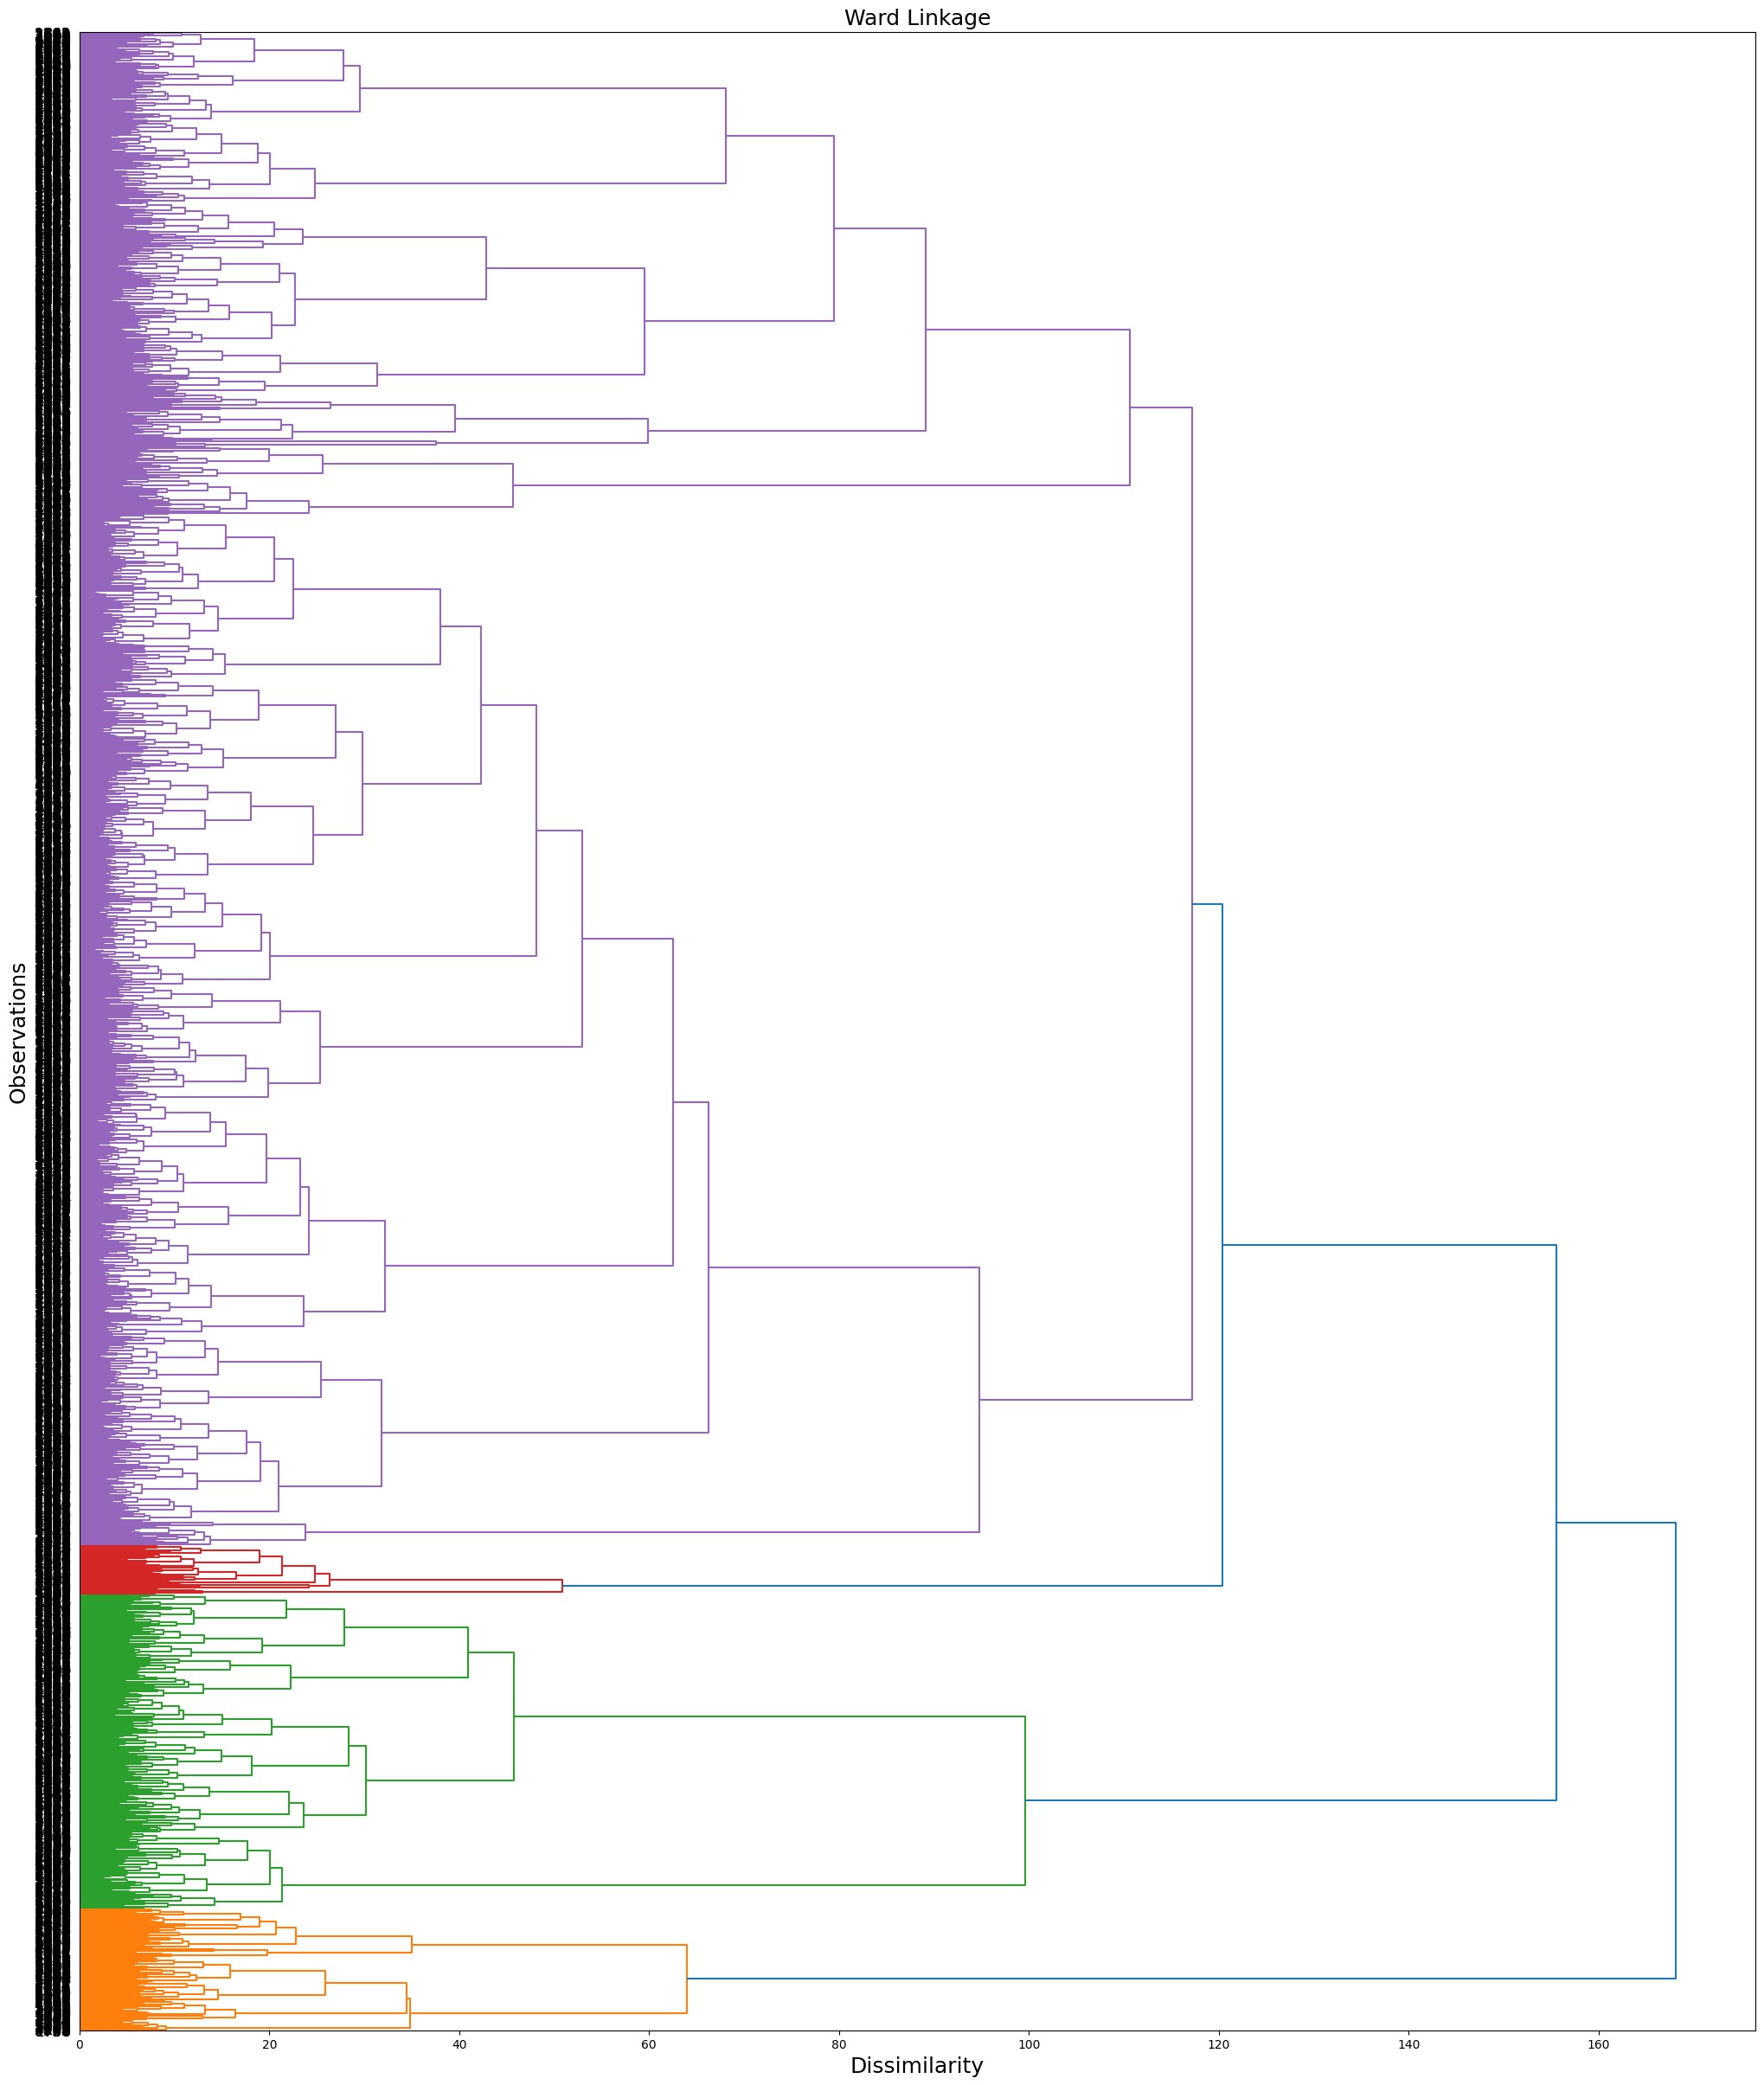

In [34]:
fig, ax = plt.subplots(figsize=(25, 30))
d=dendrogram(Z, orientation='right', ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Ward Linkage', fontsize=18)
plt.show()

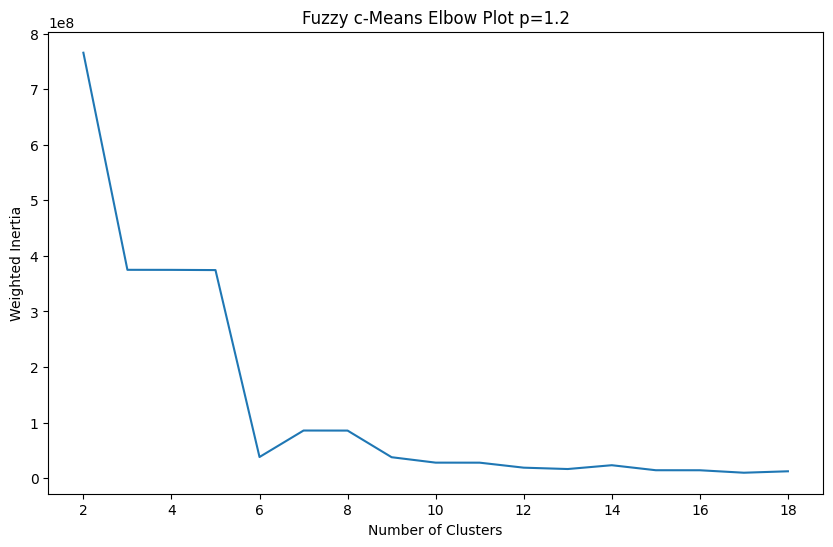

In [67]:
#fuzzy c-means clustering
weighted_inertia = []
data = num_df.values.T  
for c in range(2,19):
    centroids, W, _, _, obj_history, _, ndpc = cmeans(data, c=c, m=1.2, error=1e-6, maxiter=20000, seed=100)
    weighted_inertia.append(obj_history[-1])

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2,19,1), weighted_inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Weighted Inertia")
plt.title("Fuzzy c-Means Elbow Plot p=1.2")
plt.show()


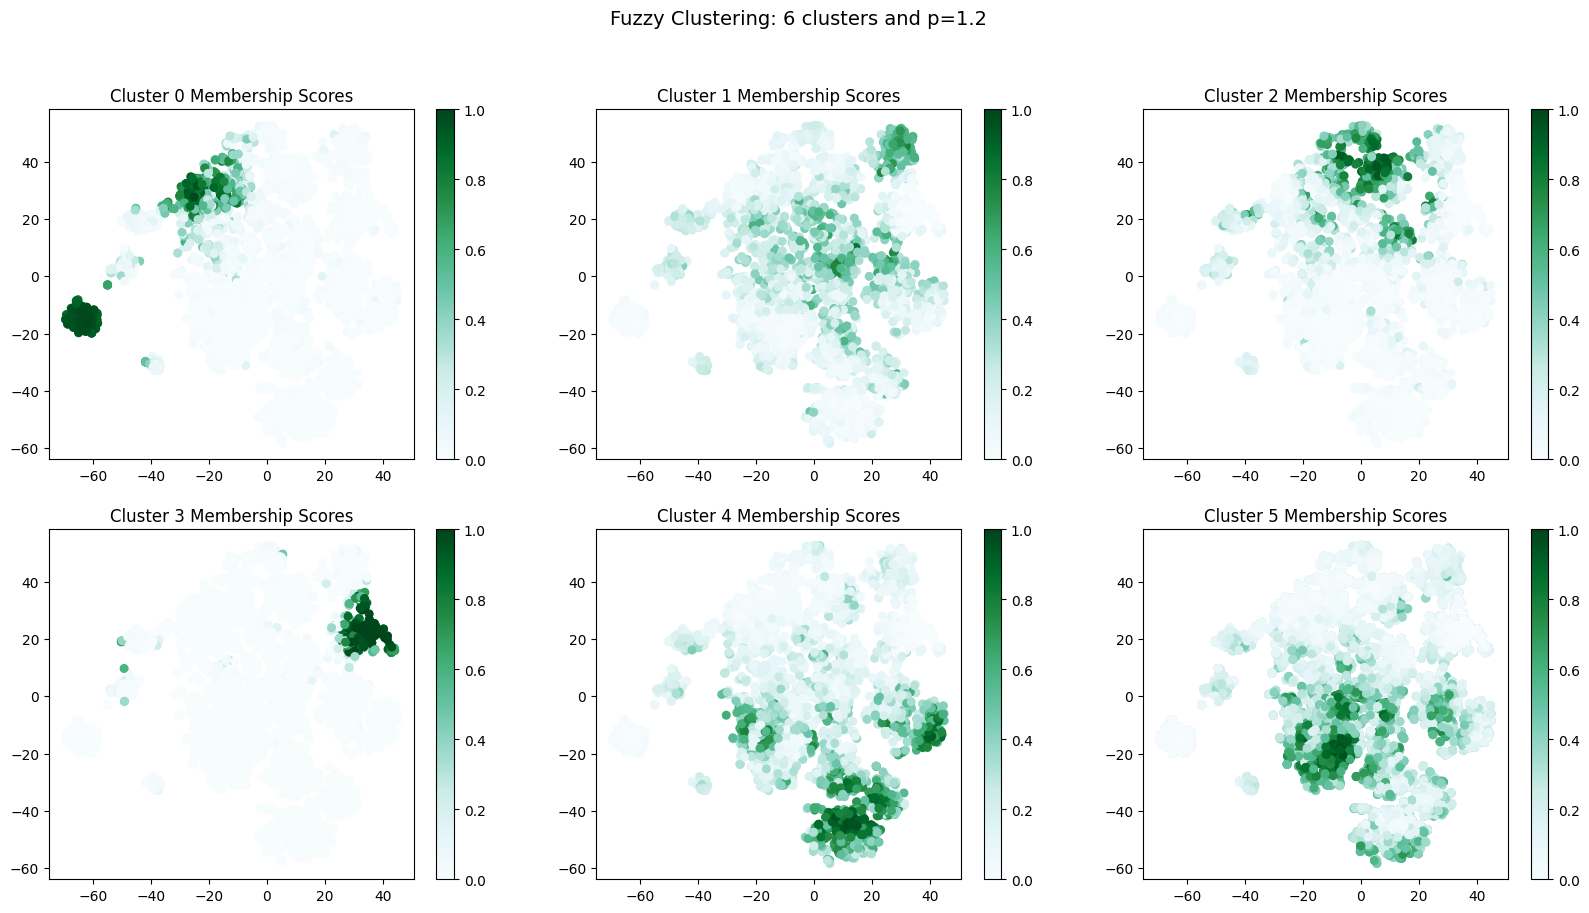

In [68]:
#Color code t-SNE Plots
c=6
p=1.2
centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(num_df_scaled.T, c=6, m=1.2, error=1e-6, maxiter=20000, seed=100)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,6):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/3)),int(i%3)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/3)),int(i%3)])
    ax[int(np.floor(i/3)),int(i%3)].set_title('Cluster %s Membership Scores'%(str(i)))
plt.show()

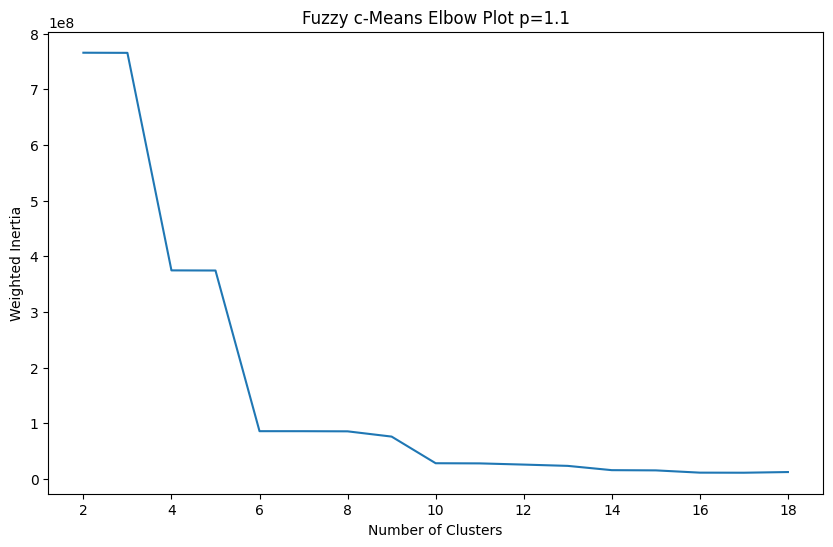

In [69]:
#fuzzy c-means clustering
weighted_inertia = []
data = num_df.values.T  
for c in range(2,19):
    centroids, W, _, _, obj_history, _, ndpc = cmeans(data, c=c, m=1.1, error=1e-6, maxiter=20000, seed=100)
    weighted_inertia.append(obj_history[-1])

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2,19,1), weighted_inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Weighted Inertia")
plt.title("Fuzzy c-Means Elbow Plot p=1.1")
plt.show()


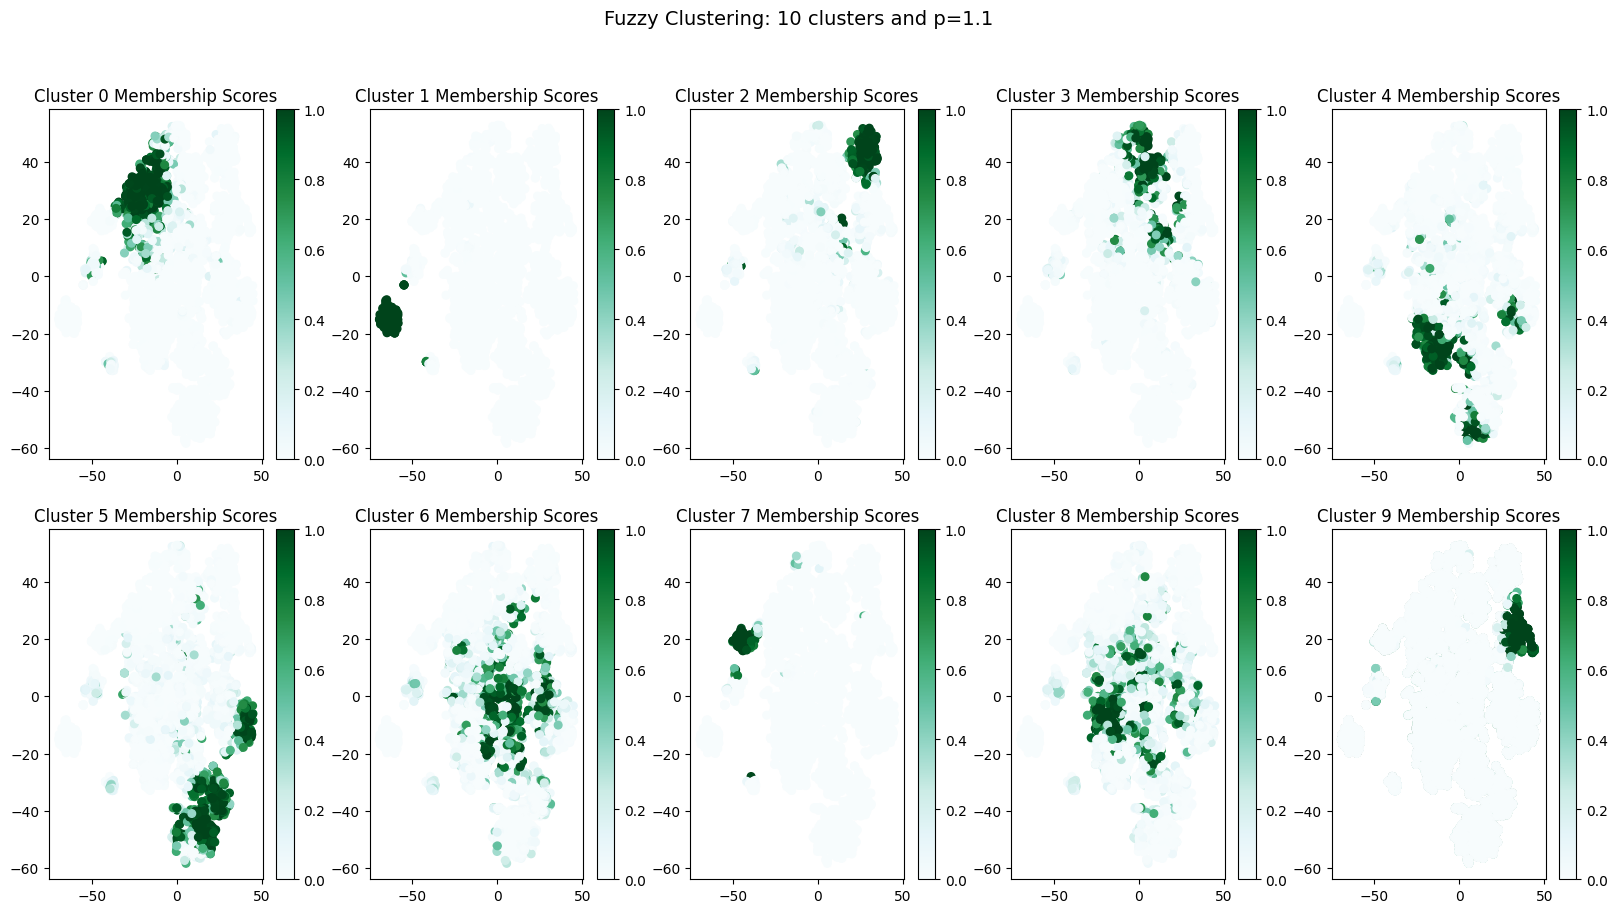

In [70]:
#Color code t-SNE Plots
c=10
p=1.1
centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(num_df_scaled.T, c=10, m=1.1, error=1e-6, maxiter=20000, seed=100)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,10):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/5)),int(i%5)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/5)),int(i%5)])
    ax[int(np.floor(i/5)),int(i%5)].set_title('Cluster %s Membership Scores'%(str(i)))
plt.show()

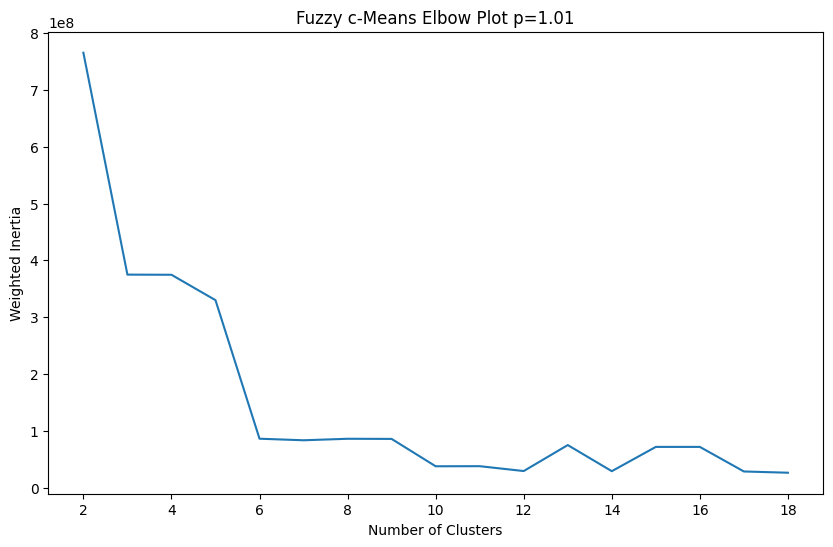

In [71]:
#fuzzy c-means clustering
weighted_inertia = []
data = num_df.values.T  
for c in range(2,19):
    centroids, W, _, _, obj_history, _, ndpc = cmeans(data, c=c, m=1.01, error=1e-6, maxiter=20000, seed=100)
    weighted_inertia.append(obj_history[-1])

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2,19,1), weighted_inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Weighted Inertia")
plt.title("Fuzzy c-Means Elbow Plot p=1.01")
plt.show()


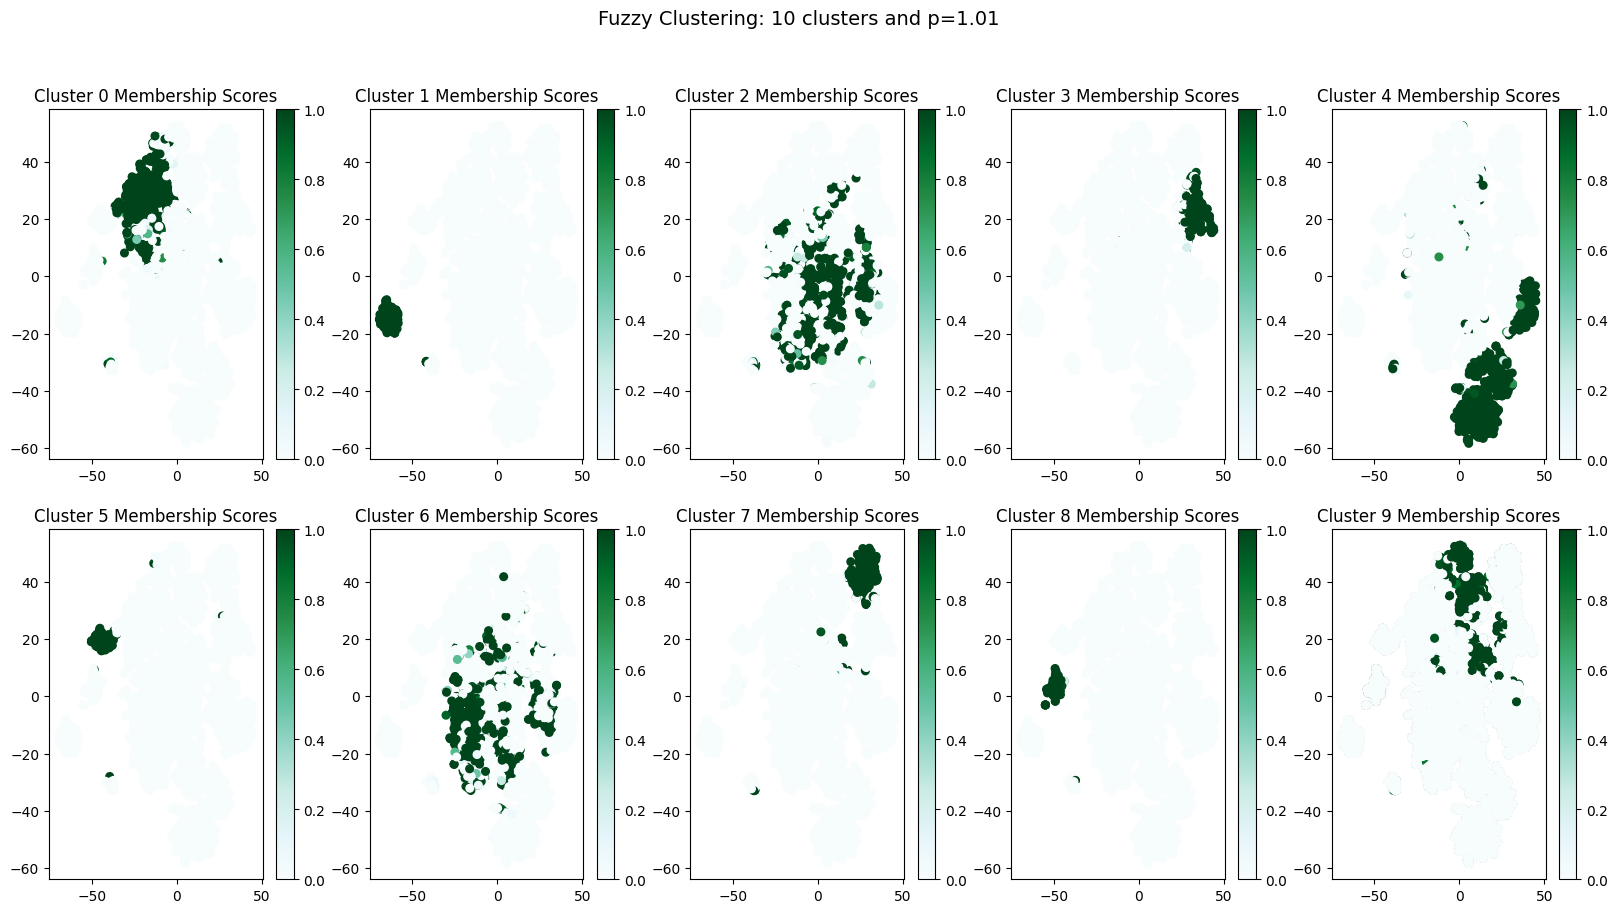

In [72]:
#Color code t-SNE Plots
c=10
p=1.01
centroids, W, W_0, dist_mat, history, iters, ndpc = cmeans(num_df_scaled.T, c=10, m=1.01, error=1e-6, maxiter=20000, seed=100)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0,10):

    #Create a column with cluster i membership scores
    df_combo['Cluster %s Membership Score'%str(i)]=W[i,:]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                         s=30, cmap="BuGn",
                        vmin=0,
                        vmax=1)
    ax[int(np.floor(i/5)),int(i%5)].scatter(df_combo["x_projected"], df_combo["y_projected"],
                 c=df_combo['Cluster %s Membership Score'%str(i)],
                                            s=30, cmap="BuGn",
                                           vmin=0,
                                           vmax=1)

    fig.colorbar(points, ax=ax[int(np.floor(i/5)),int(i%5)])
    ax[int(np.floor(i/5)),int(i%5)].set_title('Cluster %s Membership Scores'%(str(i)))
plt.show()

c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

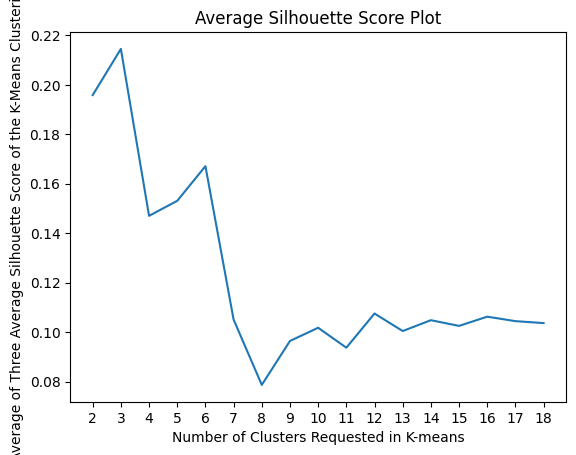

In [75]:
#kmeans clustering
#Evaluating for k=2,3,...,19 clusters
cluster_num_list=range(2,19)
X=num_df_scaled
#Generating a List of Average Average Silhouette Scores
avg_avg_sil_score_list=[]
for k in cluster_num_list:
    avg_sil_score_list=[]
    for i in range(1):
        #Clusters the dataset
        kmeans=KMeans(n_clusters=k, random_state=42).fit(X)

        #Extract the cluster labels of the clustering
        cluster_labels = kmeans.labels_

        #Finds the average silhoutte score of ALL objects in the given clustering
        avg_sil_score=silhouette_score(X, cluster_labels)

        #Appends this
        avg_sil_score_list.append(avg_sil_score)
    #print('Average Silhouette Score with k=%s Clusters'%(k))
    #print(avg_sil_score_list)

    #Takes the average of the three average silhouette scores (from each of the three clustering with k clusters produced)
    avg_avg_sil_score_list.append(np.average(avg_sil_score_list))

#Plot it
plt.plot(cluster_num_list,avg_avg_sil_score_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average of Three Average Silhouette Score of the K-Means Clusterings')
plt.xticks(cluster_num_list)
plt.title('Average Silhouette Score Plot')
plt.show()

In [ ]:
## looking to use k=3 or k=6 clusters, case can be made for 10/12 clusters as well

c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

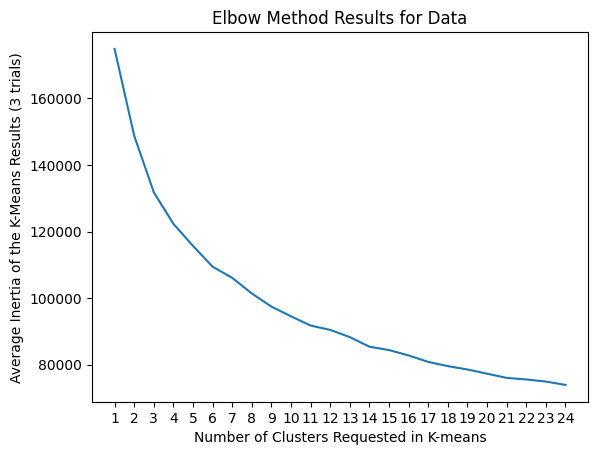

In [104]:
cluster_num_list=range(1,25)
avg_inertia_list=[]
for k in cluster_num_list:
  sub_inertia_list=[]
  for i in range(0,4):
    kmeans = KMeans(n_clusters=k, random_state=i).fit(X)
    sub_inertia_list.append(kmeans.inertia_)
  avg_inertia_list.append(np.average(sub_inertia_list))

plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.xticks(np.arange(1,25,1))
plt.show()

In [ ]:
#no sharp elbow, but k=3,6,10 can be used, kmeans is not really great for this data

In [92]:
kmeans=KMeans(n_clusters=3,random_state=42).fit(num_df_scaled)
X['predicted cluster']=kmeans.labels_
X.head()
X['predicted cluster'].value_counts()

c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


predicted cluster
0    3284
1     854
2     286
Name: count, dtype: int64

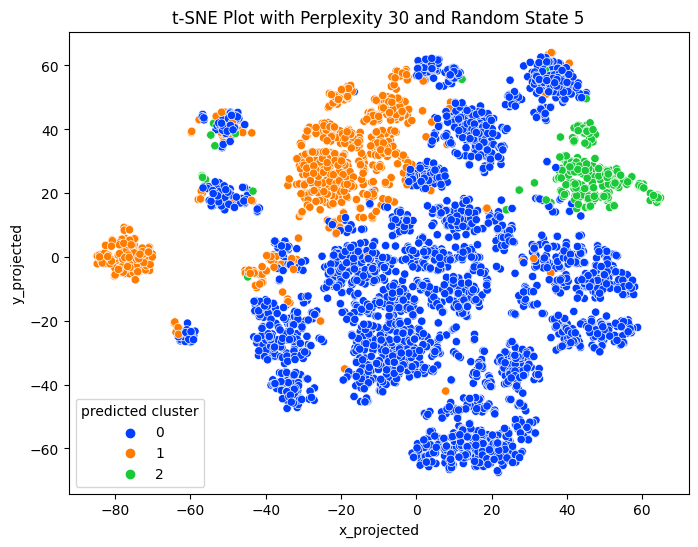

In [93]:
for perp in [30]:
    for rs in [5]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(num_df_scaled)

        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])

        df_combo = pd.concat([X.reset_index(drop=True), df_tsne], axis=1)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_combo, x='x_projected', y='y_projected', hue='predicted cluster', palette='bright')
        plt.title(f't-SNE Plot with Perplexity {perp} and Random State {rs}')
        plt.show()

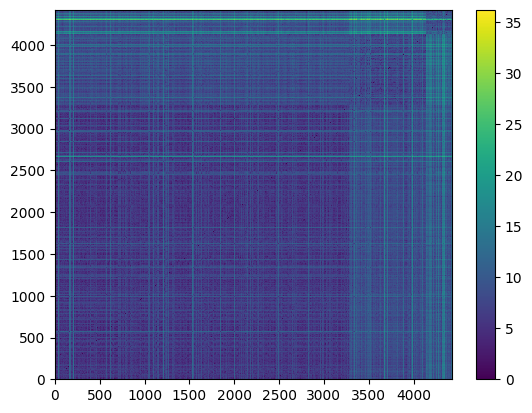

In [94]:
#Cluster-sorted similarity matrix
df_sort=X.sort_values(by=['predicted cluster'])
df_sort=df_sort.drop(['predicted cluster'], axis=1)

#Create a distance matrix
dist_mat = squareform(pdist(df_sort))

#Then visualize the distance matrix with a heat map.
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.2203698549154264


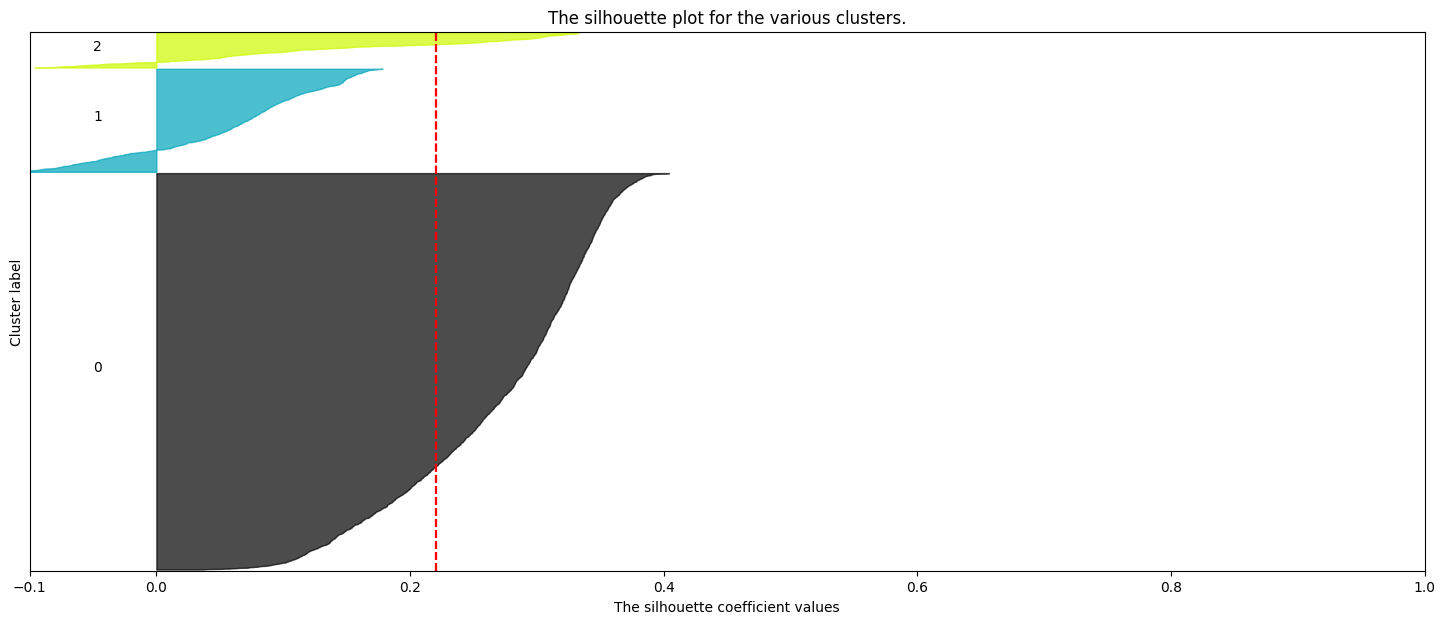

In [95]:
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
#silhouette plot
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm

    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]


        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()

    return
cluster_labels=kmeans.labels_
show_silhouette_plots(X, cluster_labels)

In [96]:
# Separate the 'predicted cluster' column
predicted_cluster = num_df_scaled['predicted cluster']

# Unscale the rest of the columns
unscaled_data = pd.DataFrame(
  st_tmp.inverse_transform(num_df_scaled.drop(columns=['predicted cluster'])),
  columns=num_df_scaled.drop(columns=['predicted cluster']).columns
)

# Add the 'predicted cluster' column back
unscaled_data['predicted cluster'] = predicted_cluster

unscaled_data.head()

Marital status  Application mode  Application order  Course  \
0             1.0              17.0                5.0   171.0   
1             1.0              15.0                1.0  9254.0   
2             1.0               1.0                5.0  9070.0   
3             1.0              17.0                2.0  9773.0   
4             2.0              39.0                1.0  8014.0   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         1.0                     1.0   
3                         1.0                     1.0   
4                         0.0                     1.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0          1.0                    19.0   
1                           160.0          1.0                     1.0   
2                           122.0          1.0                    37.0   
3                           122.0          1.0                    38.0   
4                           100.0          1.0                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                    12.0  ...                                  0.0   
1                     3.0  ...                                  0.0   
2                    37.0  ...                                  0.0   
3                    37.0  ...                                  0.0   
4                    38.0  ...                                  0.0   

   Curricular units 2nd sem (enrolled)  \
0                                  0.0   
1                                  6.0   
2                                  6.0   
3                                  6.0   
4                                  6.0   

   Curricular units 2nd sem (evaluations)  \
0                                     0.0   
1                                     6.0   
2                                     0.0   
3                                    10.0   
4                                     6.0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                  0.0                          0.000000   
1                                  6.0                         13.666667   
2                                  0.0                          0.000000   
3                                  5.0                         12.400000   
4                                  6.0                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0               10.8   
1                                             0.0               13.9   
2                                             0.0               10.8   
3                                             0.0                9.4   
4                                             0.0               13.9   

   Inflation rate   GDP  predicted cluster  
0             1.4  1.74                  1  
1            -0.3  0.79                  0  
2             1.4  1.74                  1  
3            -0.8 -3.12                  0  
4            -0.3  0.79                  0  

[5 rows x 37 columns]

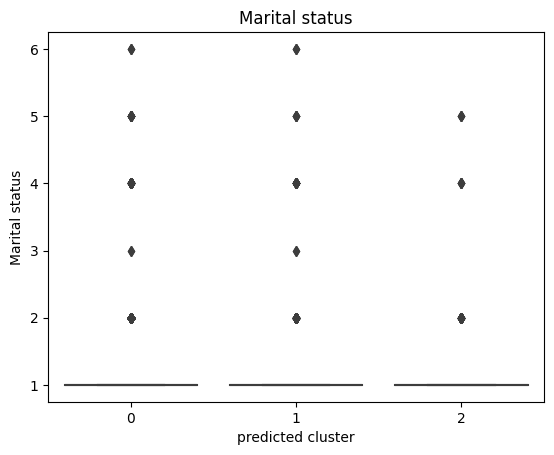

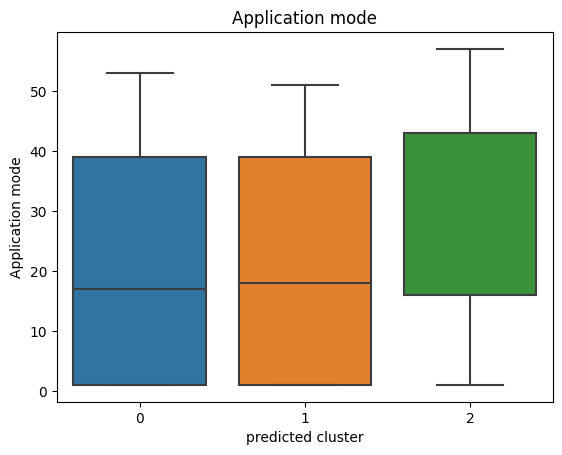

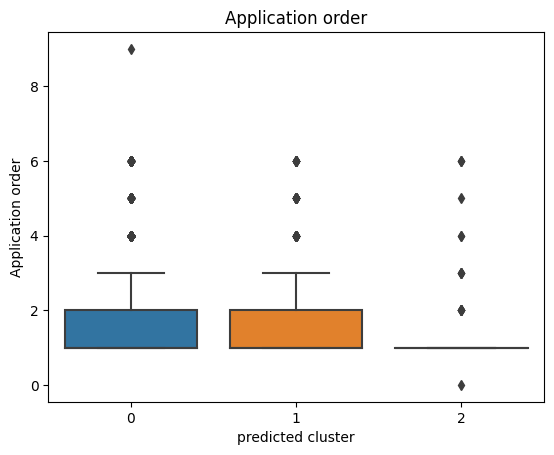

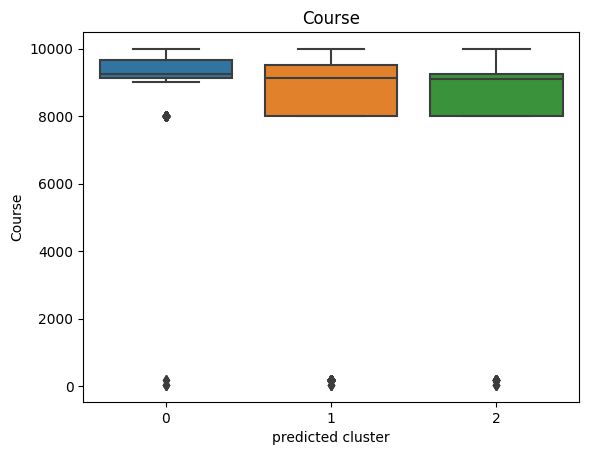

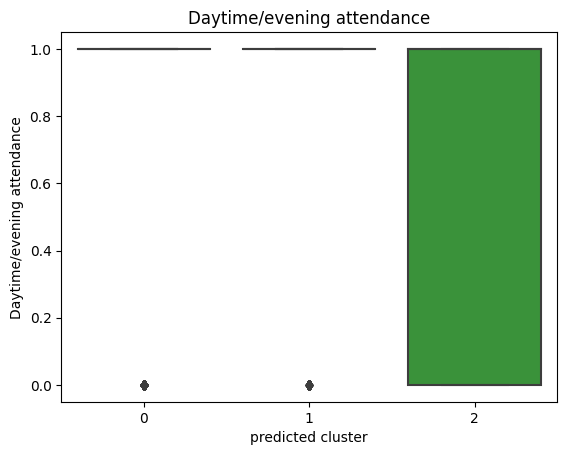

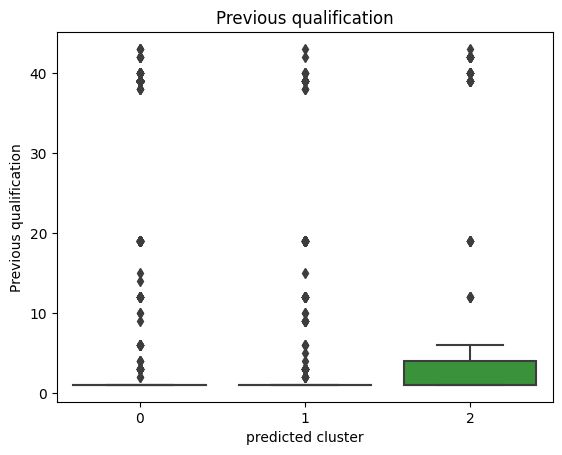

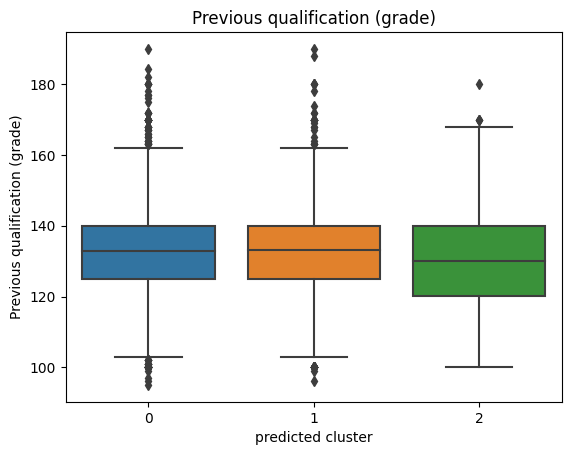

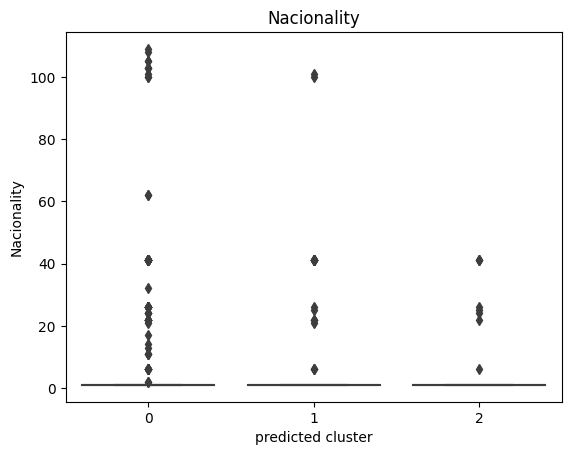

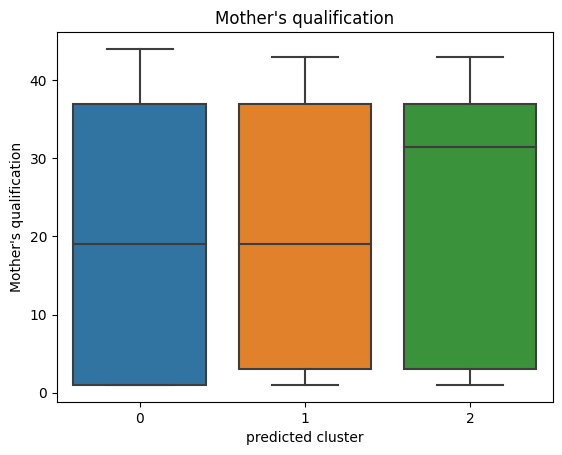

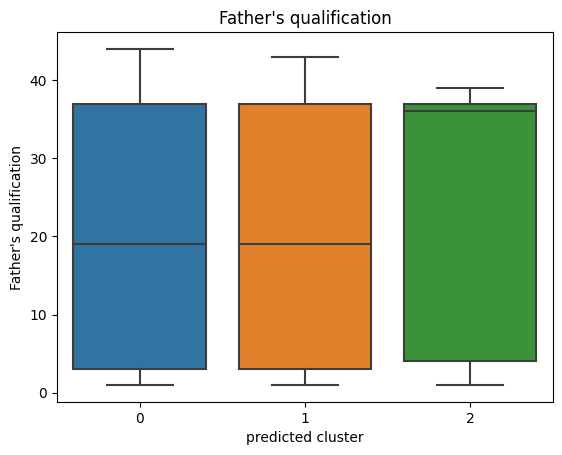

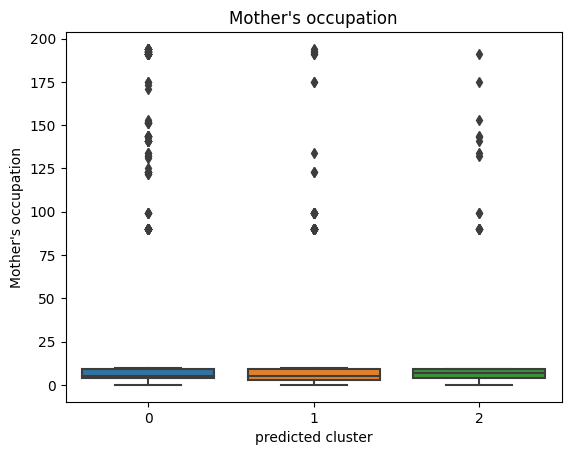

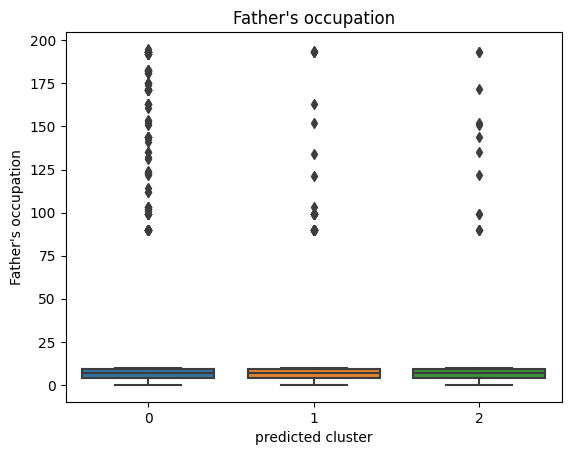

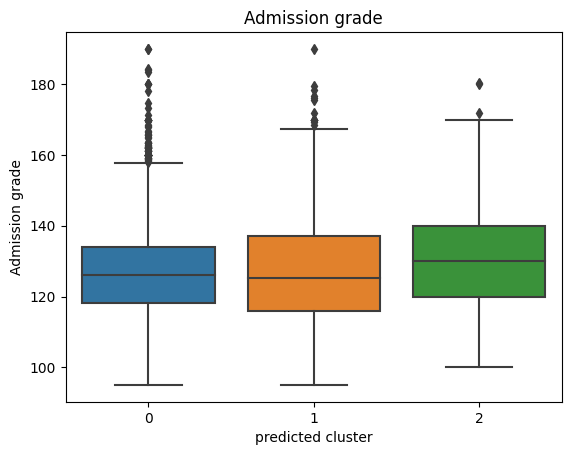

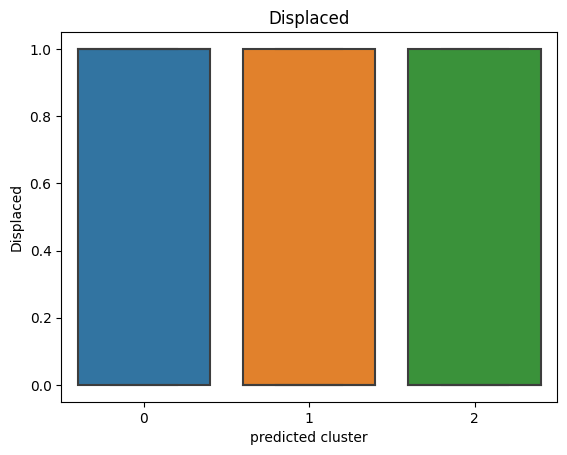

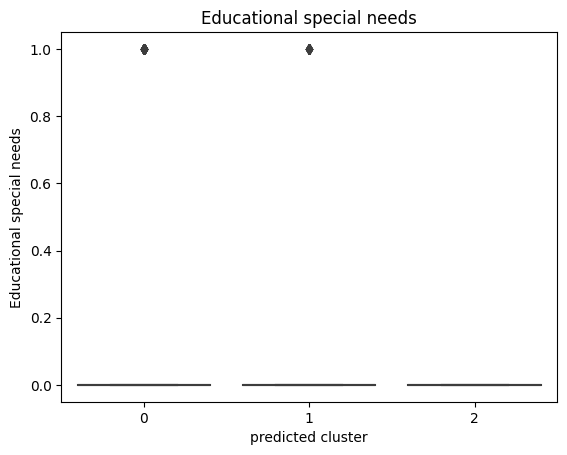

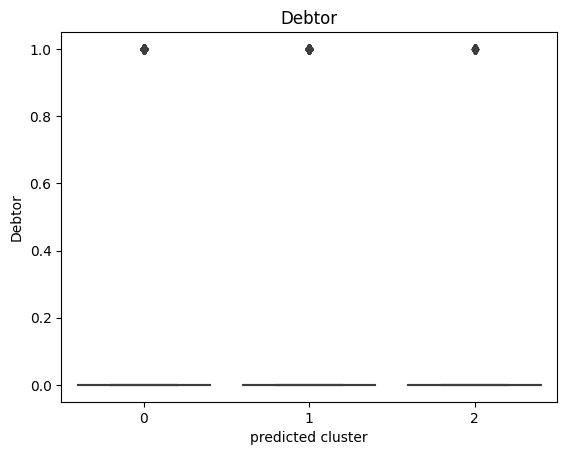

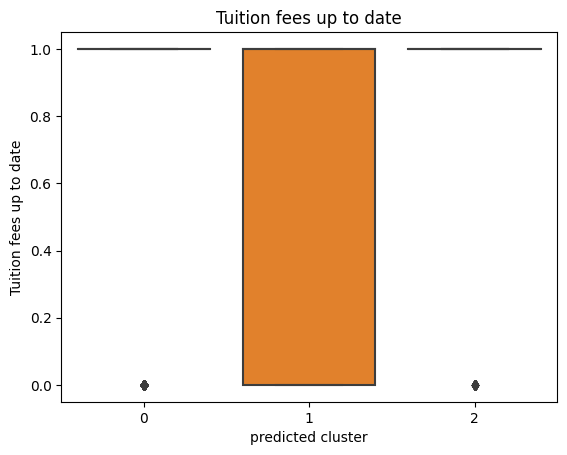

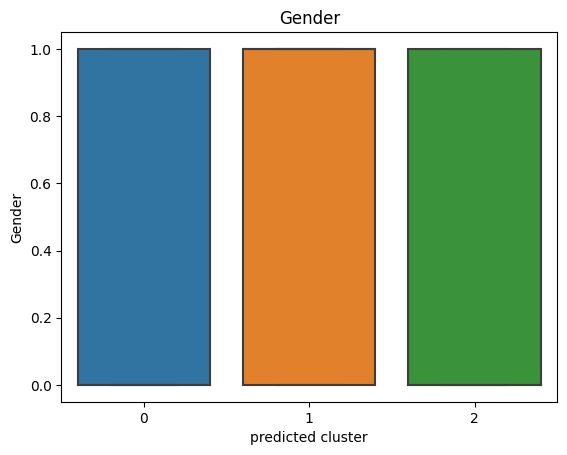

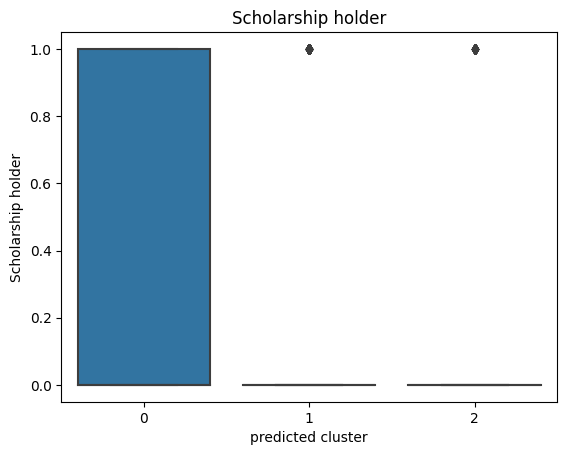

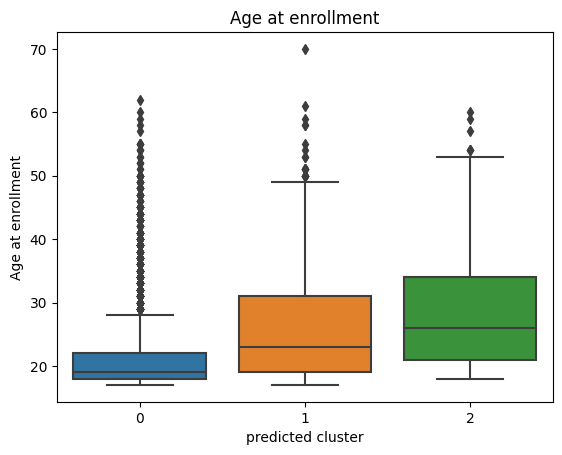

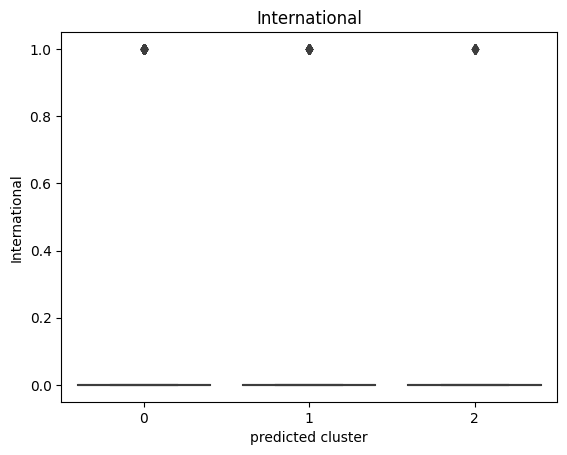

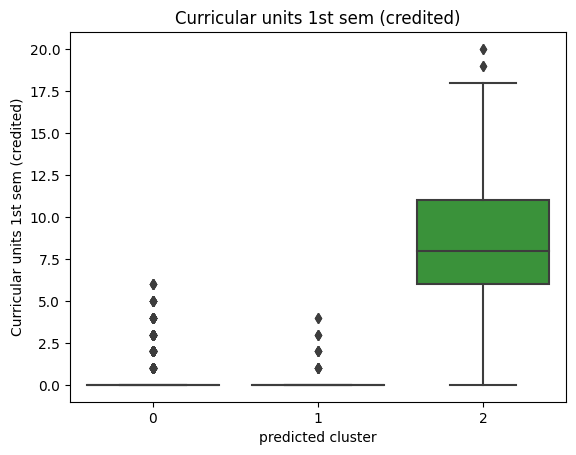

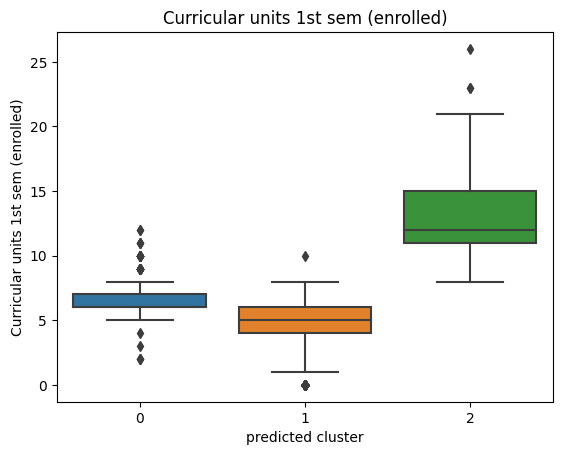

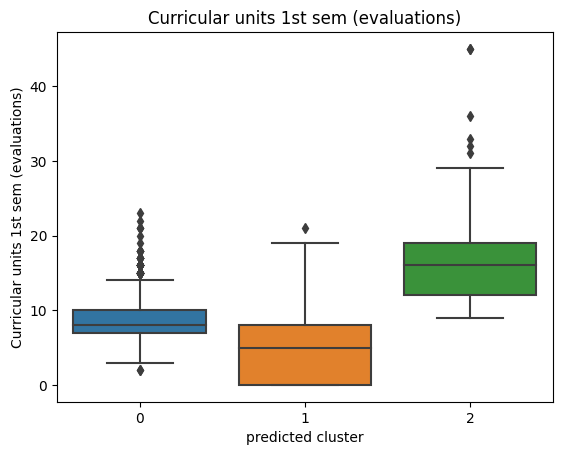

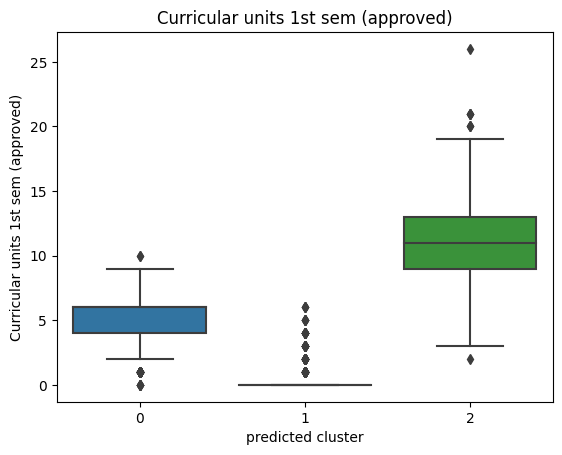

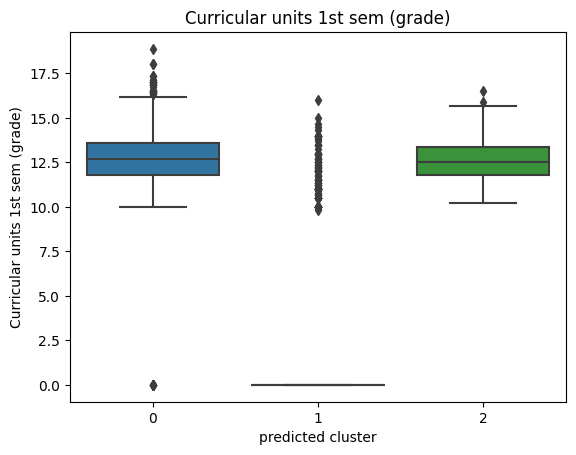

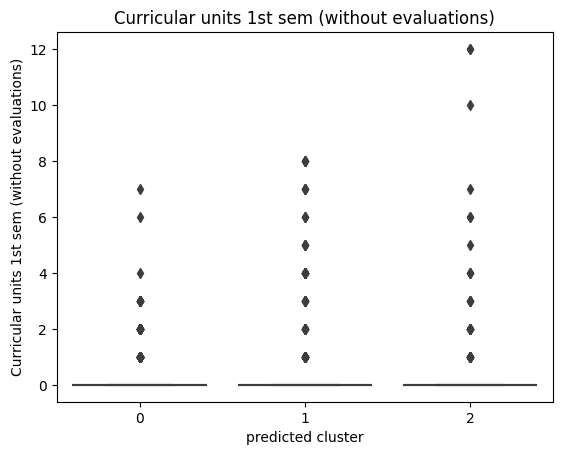

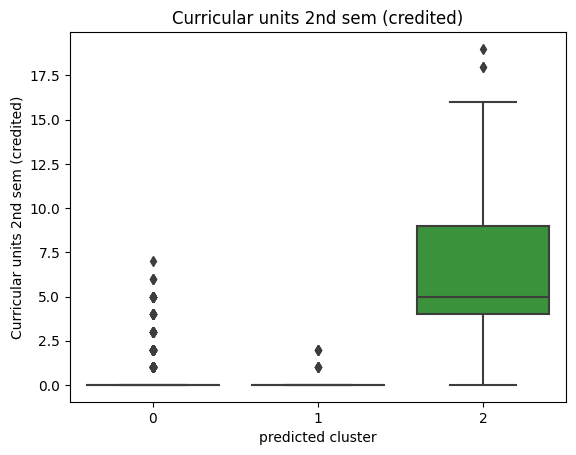

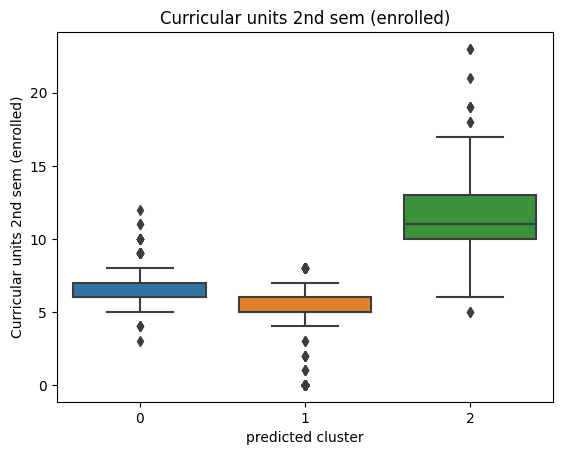

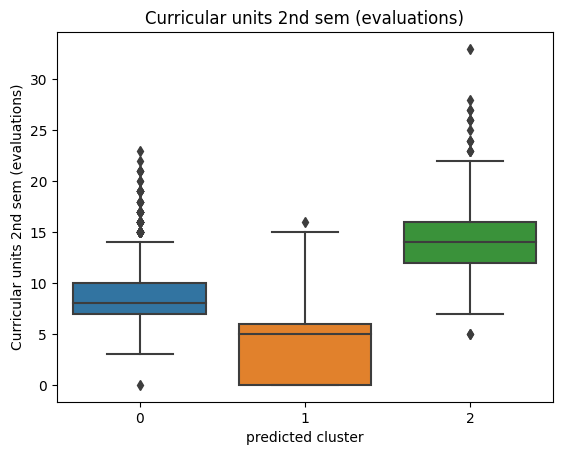

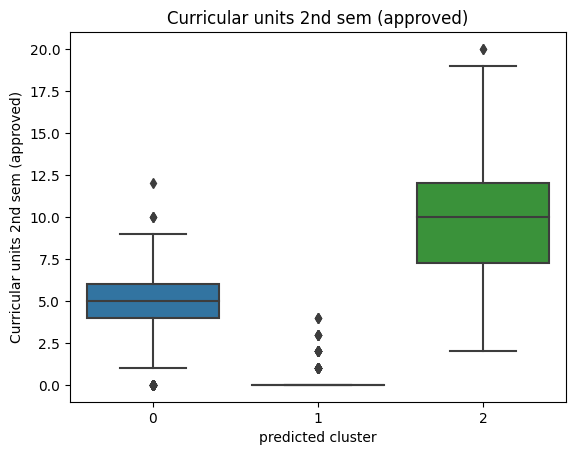

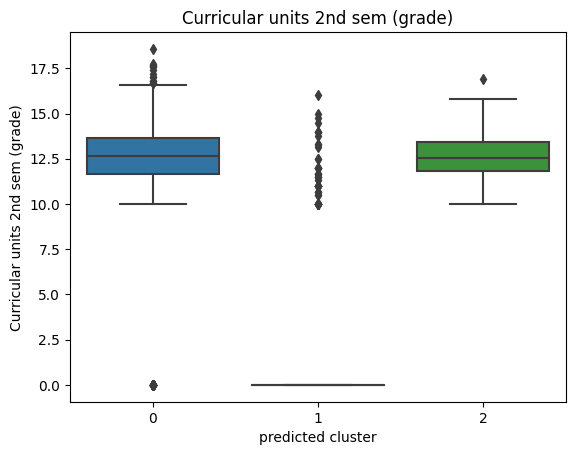

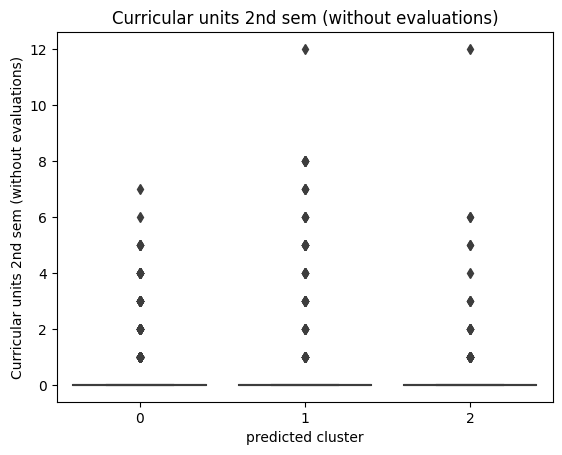

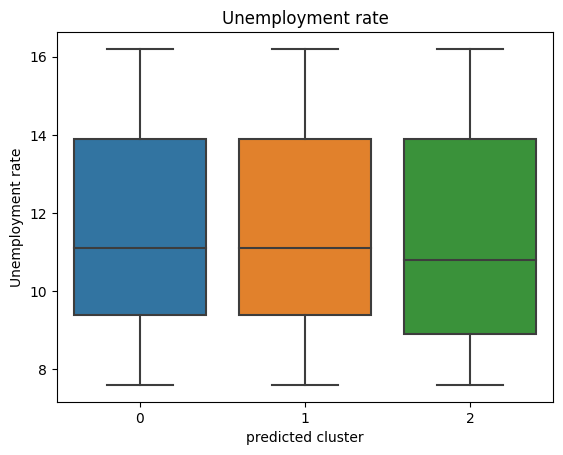

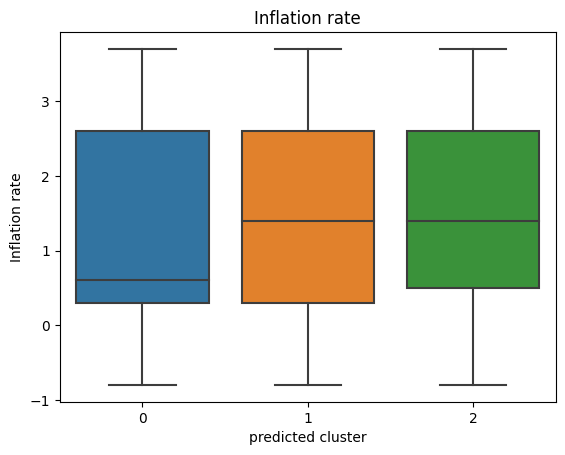

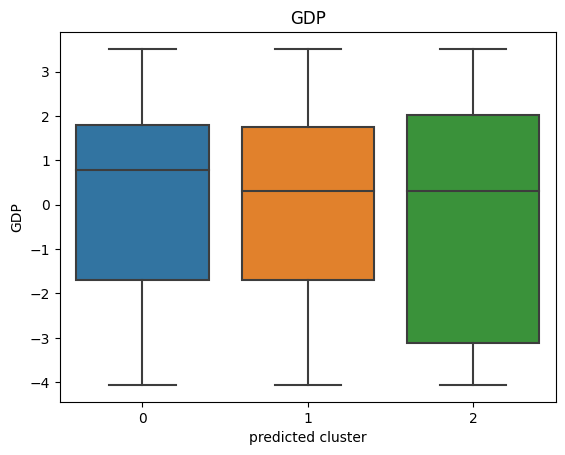

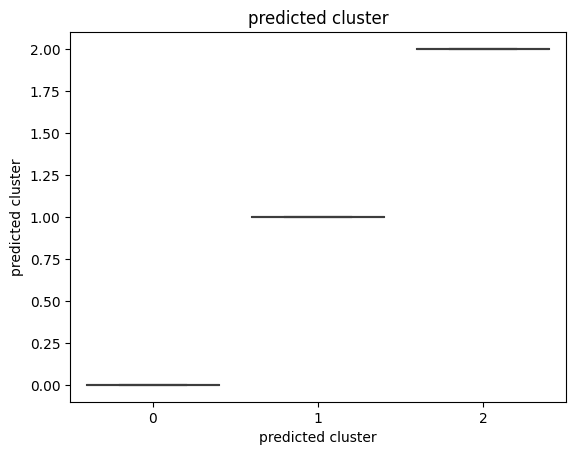

In [97]:

for col in unscaled_data.columns:
    sns.boxplot(x='predicted cluster',y=col, data=unscaled_data)
    plt.title(col)
    plt.show()

In [98]:
#with k=3
X=num_df_scaled
kmeans=KMeans(n_clusters=6,random_state=42).fit(num_df_scaled)
X['predicted cluster']=kmeans.labels_
X.head()
X['predicted cluster'].value_counts()

c:\Users\alexa\anaconda3\envs\is\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


predicted cluster
0    2398
2     817
5     651
4     256
3     179
1     123
Name: count, dtype: int64

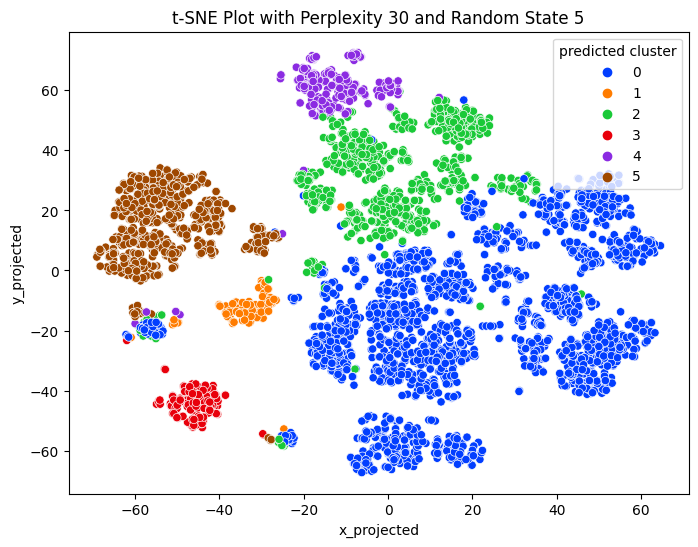

In [99]:
for perp in [30]:
    for rs in [5]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(num_df_scaled)

        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])

        df_combo = pd.concat([X.reset_index(drop=True), df_tsne], axis=1)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_combo, x='x_projected', y='y_projected', hue='predicted cluster', palette='bright')
        plt.title(f't-SNE Plot with Perplexity {perp} and Random State {rs}')
        plt.show()


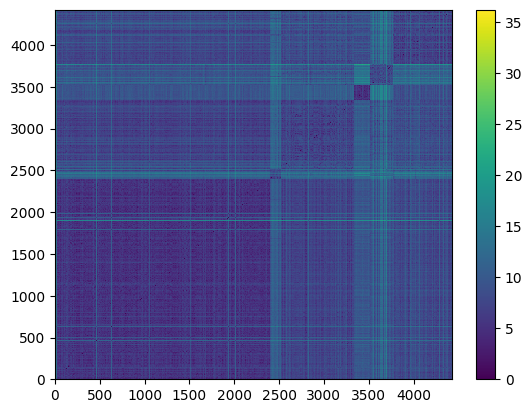

In [100]:
#Cluster-sorted similarity matrix
df_sort=X.sort_values(by=['predicted cluster'])
df_sort=df_sort.drop(['predicted cluster'], axis=1)

#Create a distance matrix
dist_mat = squareform(pdist(df_sort))

#Then visualize the distance matrix with a heat map.
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()


For n_clusters = 6 The average silhouette_score is : 0.2037744776659452


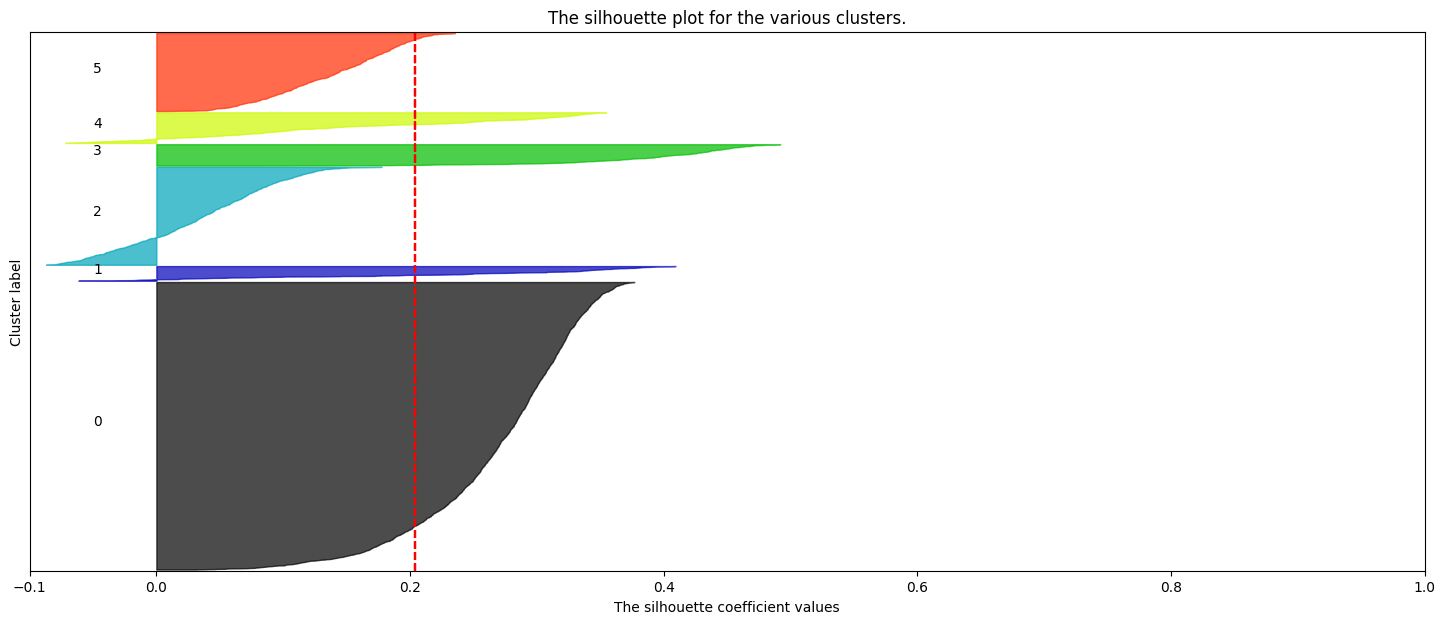

In [101]:

from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
#silhouette plot
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm

    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]


        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()

    return
cluster_labels=kmeans.labels_
show_silhouette_plots(X, cluster_labels)

In [102]:
# Separate the 'predicted cluster' column
predicted_cluster = num_df_scaled['predicted cluster']

# Unscale the rest of the columns
unscaled_data = pd.DataFrame(
  st_tmp.inverse_transform(num_df_scaled.drop(columns=['predicted cluster'])),
  columns=num_df_scaled.drop(columns=['predicted cluster']).columns
)

# Add the 'predicted cluster' column back
unscaled_data['predicted cluster'] = predicted_cluster

unscaled_data.head()

Marital status  Application mode  Application order  Course  \
0             1.0              17.0                5.0   171.0   
1             1.0              15.0                1.0  9254.0   
2             1.0               1.0                5.0  9070.0   
3             1.0              17.0                2.0  9773.0   
4             2.0              39.0                1.0  8014.0   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         1.0                     1.0   
3                         1.0                     1.0   
4                         0.0                     1.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0          1.0                    19.0   
1                           160.0          1.0                     1.0   
2                           122.0          1.0                    37.0   
3                           122.0          1.0                    38.0   
4                           100.0          1.0                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                    12.0  ...                                  0.0   
1                     3.0  ...                                  0.0   
2                    37.0  ...                                  0.0   
3                    37.0  ...                                  0.0   
4                    38.0  ...                                  0.0   

   Curricular units 2nd sem (enrolled)  \
0                                  0.0   
1                                  6.0   
2                                  6.0   
3                                  6.0   
4                                  6.0   

   Curricular units 2nd sem (evaluations)  \
0                                     0.0   
1                                     6.0   
2                                     0.0   
3                                    10.0   
4                                     6.0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                  0.0                          0.000000   
1                                  6.0                         13.666667   
2                                  0.0                          0.000000   
3                                  5.0                         12.400000   
4                                  6.0                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0               10.8   
1                                             0.0               13.9   
2                                             0.0               10.8   
3                                             0.0                9.4   
4                                             0.0               13.9   

   Inflation rate   GDP  predicted cluster  
0             1.4  1.74                  3  
1            -0.3  0.79                  0  
2             1.4  1.74                  5  
3            -0.8 -3.12                  0  
4            -0.3  0.79                  2  

[5 rows x 37 columns]

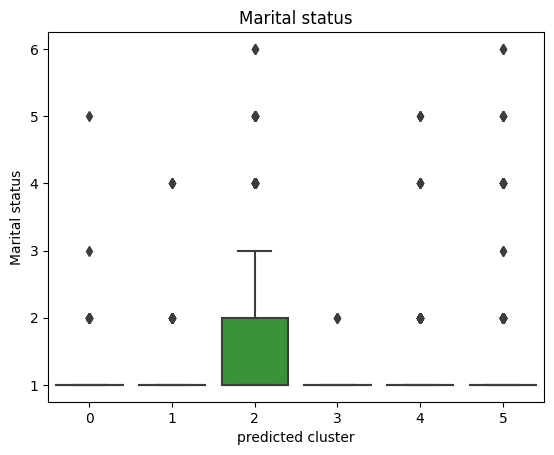

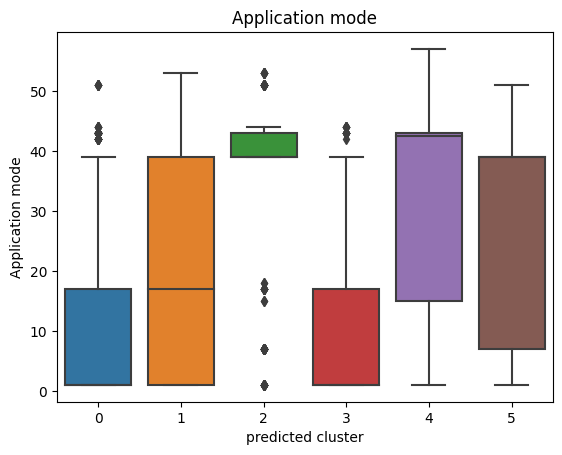

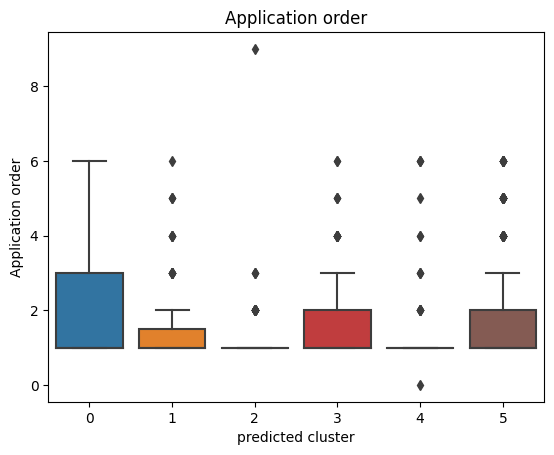

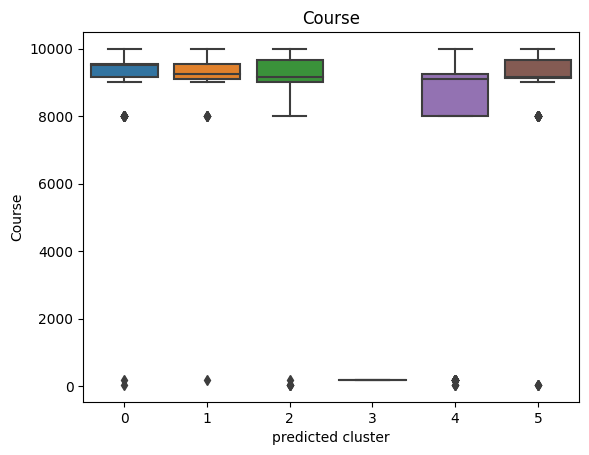

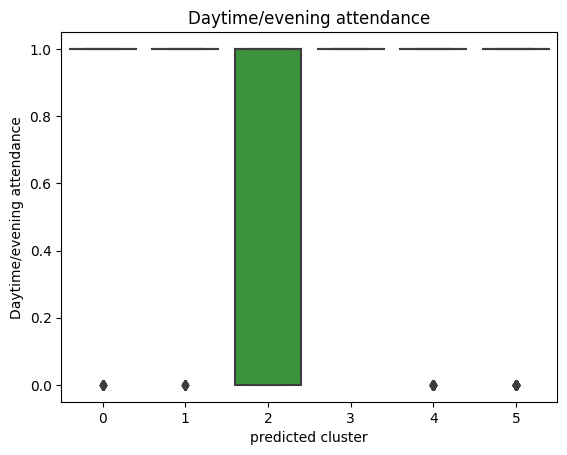

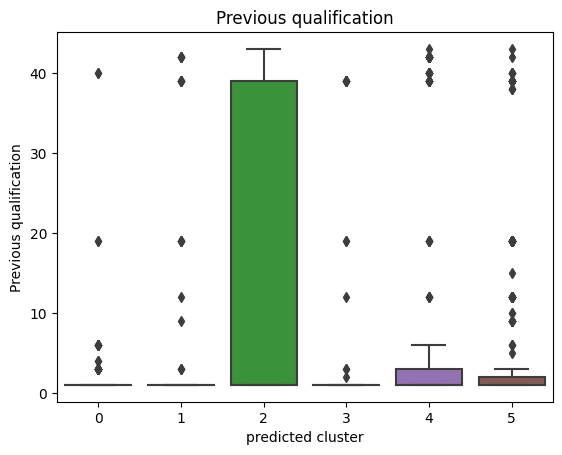

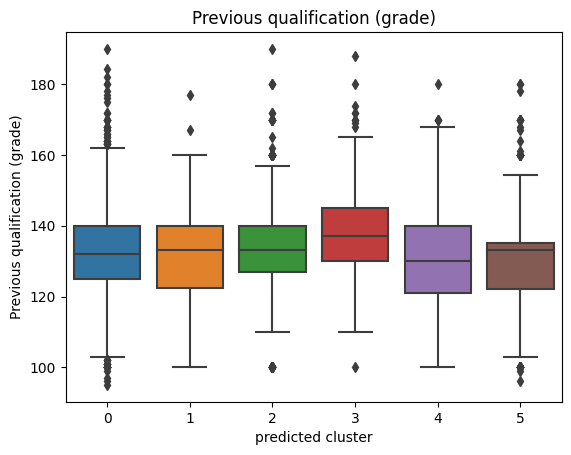

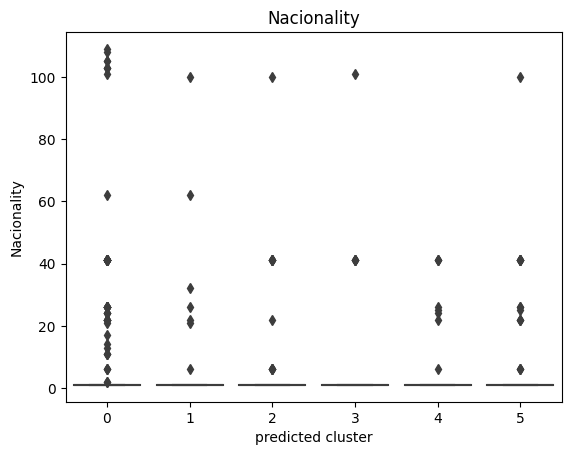

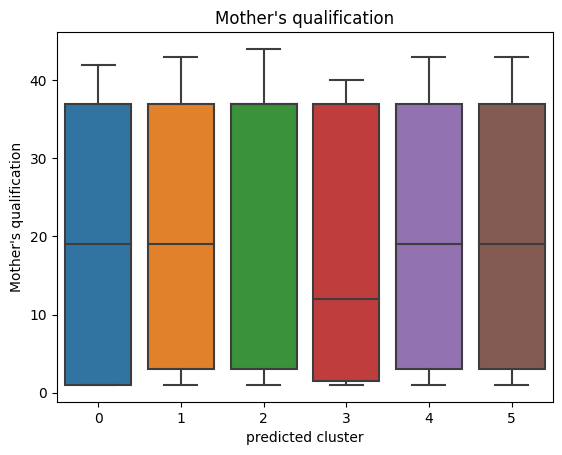

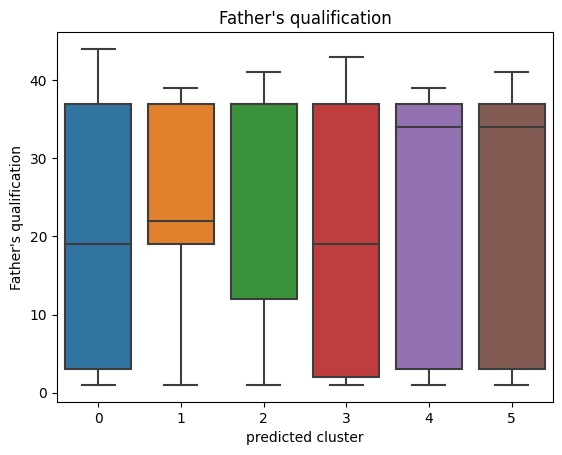

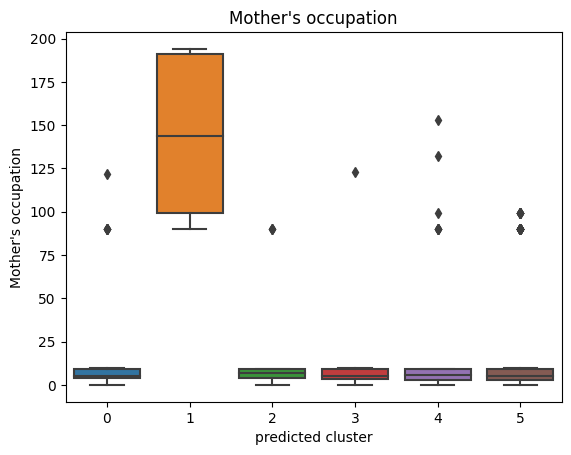

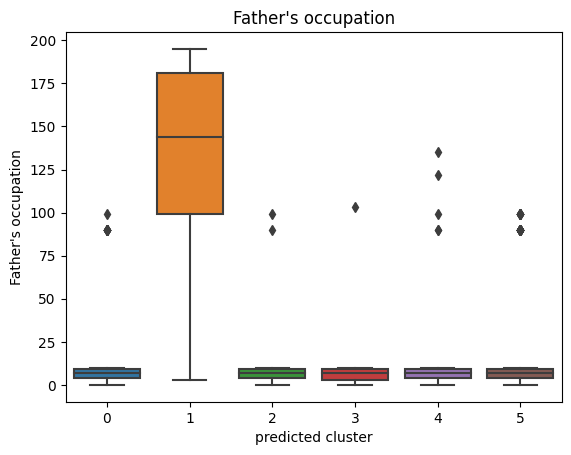

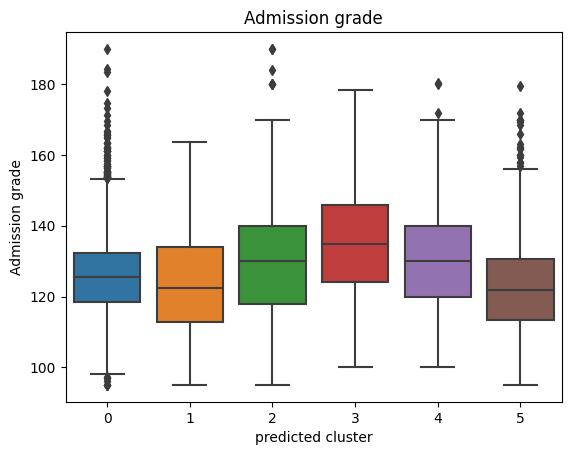

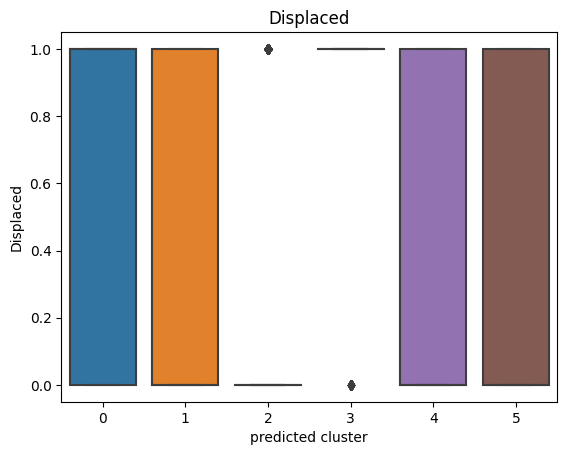

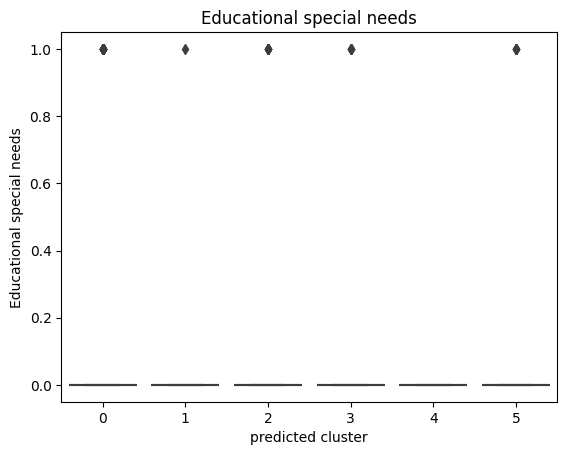

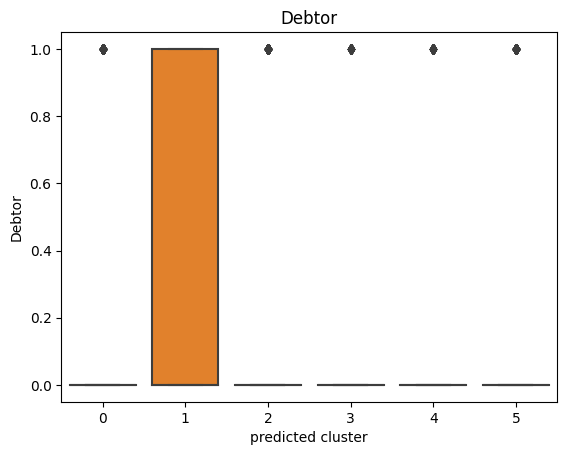

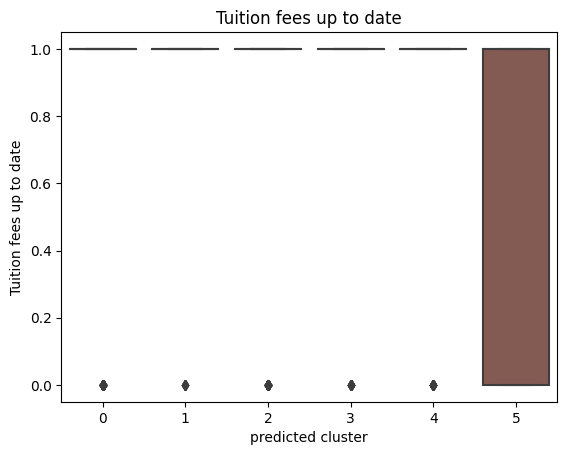

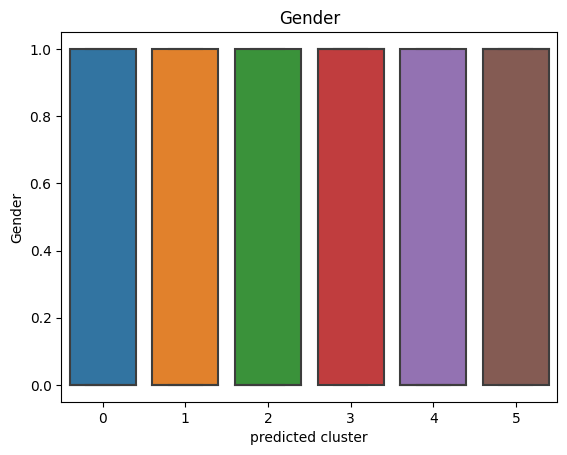

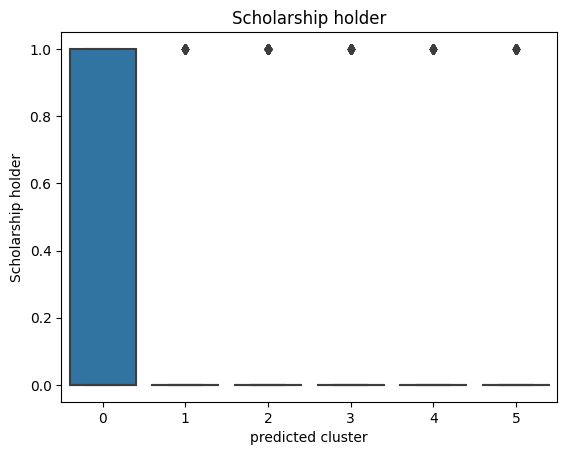

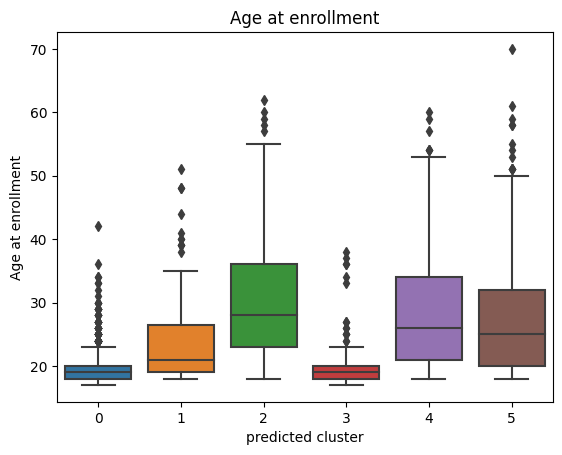

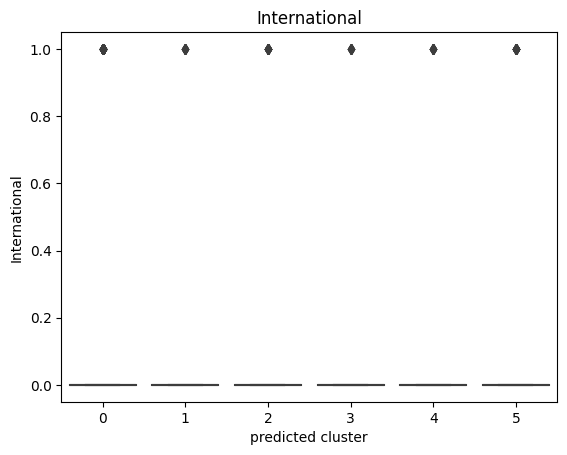

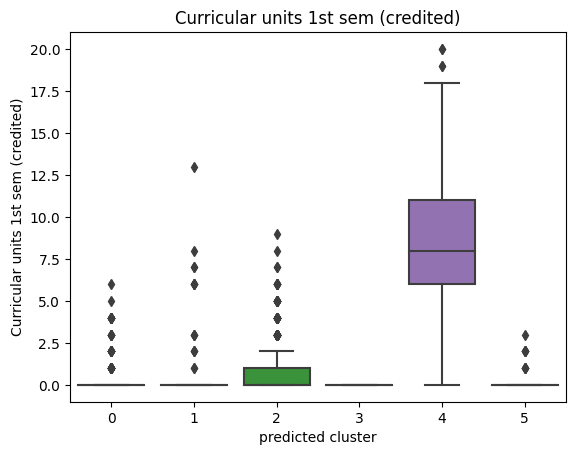

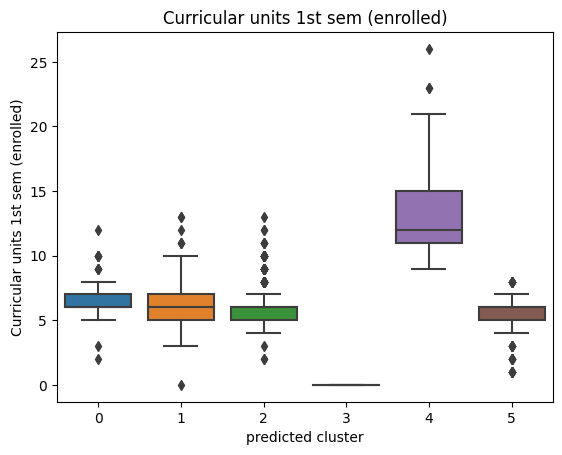

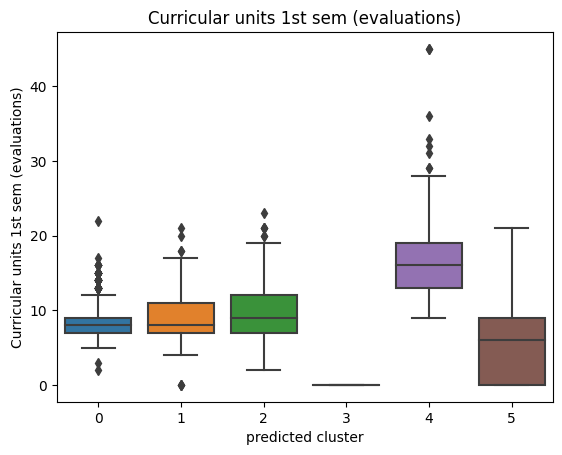

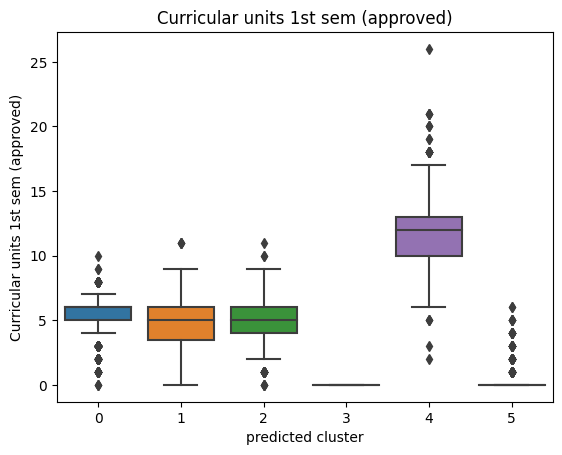

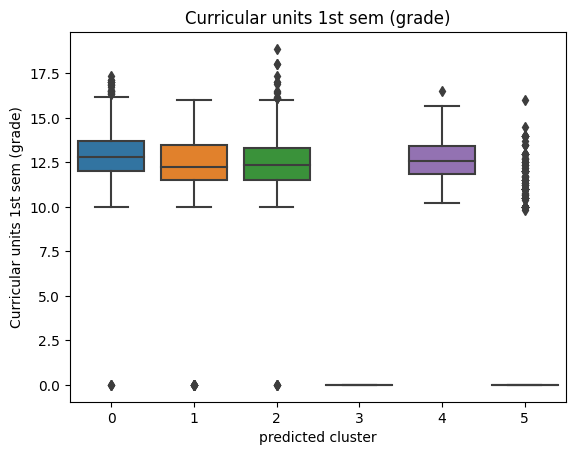

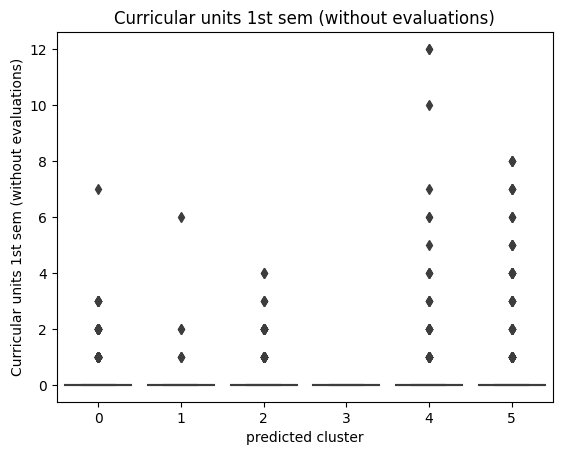

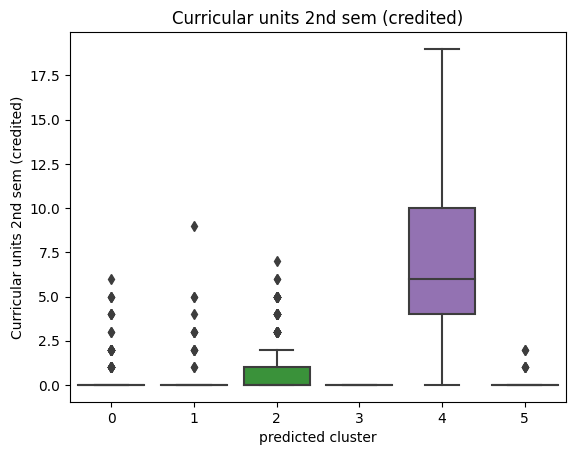

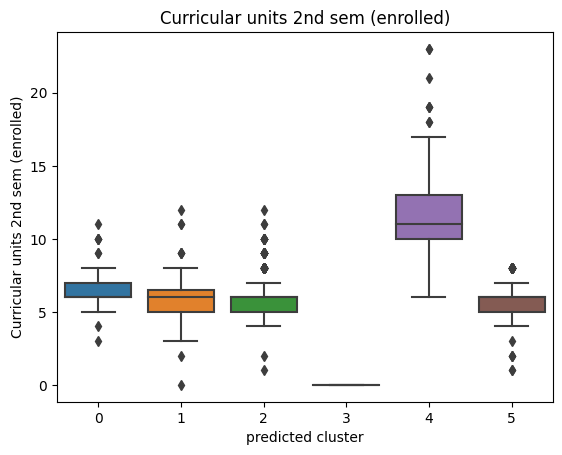

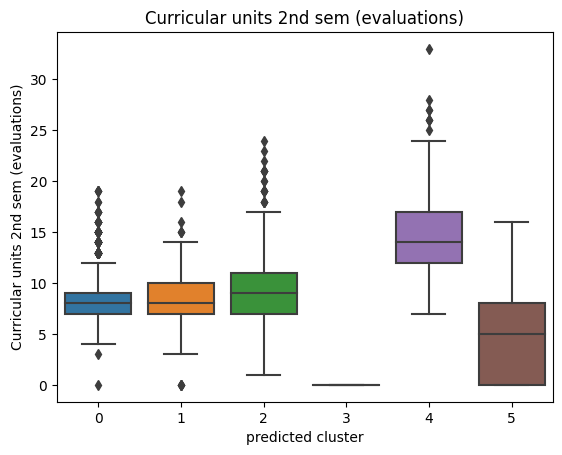

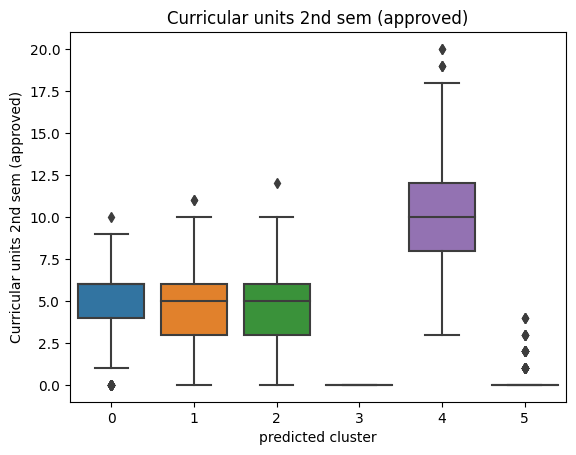

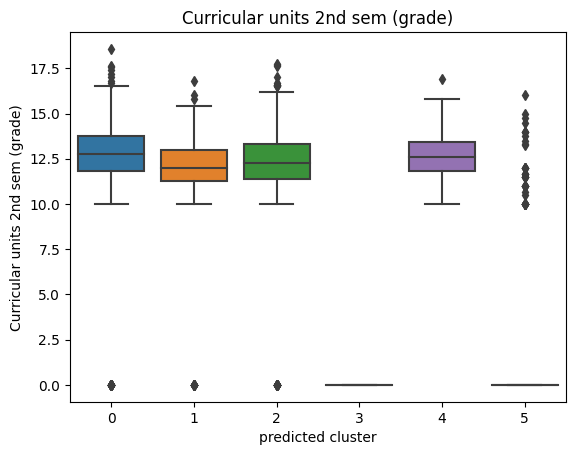

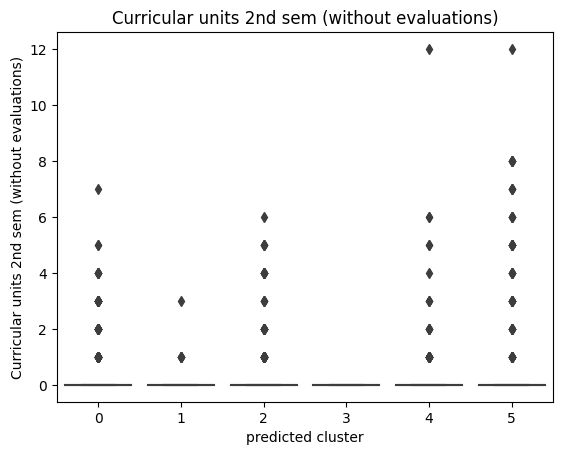

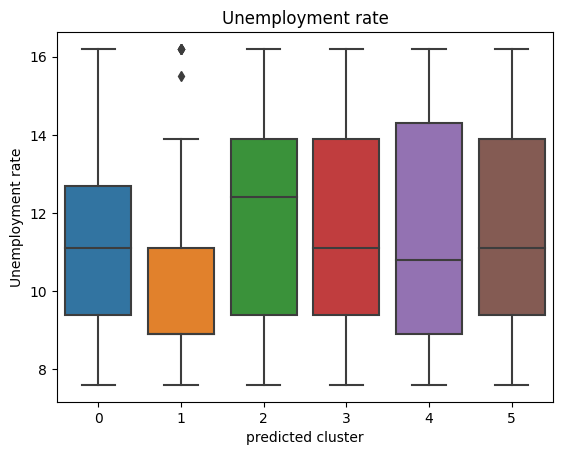

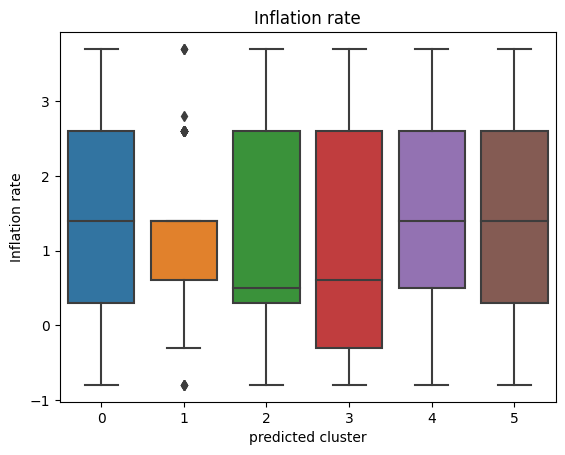

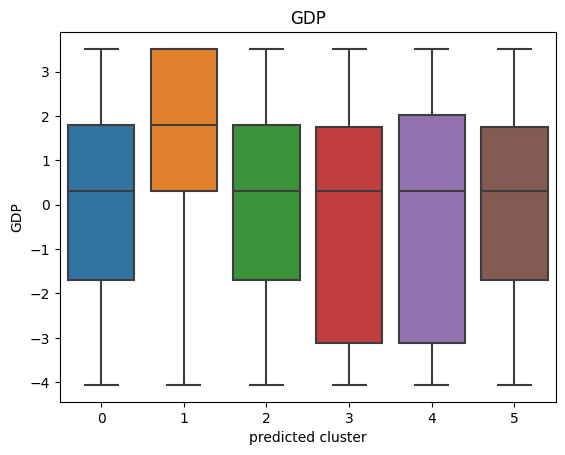

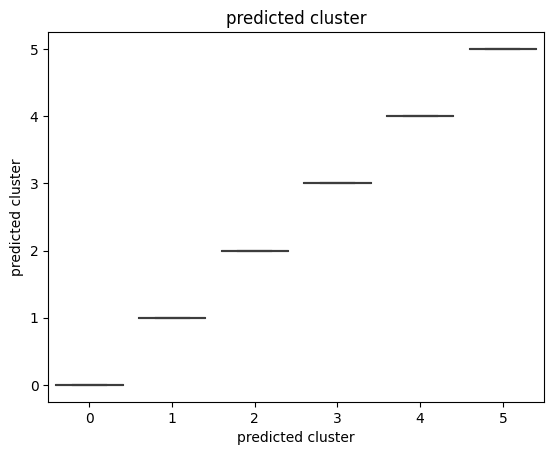

In [103]:
for col in unscaled_data.columns:
    sns.boxplot(x='predicted cluster',y=col, data=unscaled_data)
    plt.title(col)
    plt.show()